In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Public_Libraries - updated.csv')

In [3]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5105 entries, 0 to 5104
Data columns (total 29 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Fiscal Year                                         5105 non-null   int64  
 1   Library                                             5105 non-null   object 
 2   County                                              5105 non-null   object 
 3   Principal Public?                                   5105 non-null   object 
 4   AENGLC Rank                                         4988 non-null   float64
 5   Population of Service Area                          4642 non-null   float64
 6   Total Library Visits                                4886 non-null   float64
 7   Library Visits Per Capita Served                    4870 non-null   float64
 8   Total Registered Borrowers                          5000 non-null   float64
 9

In [4]:
df['Operating Expenditures Per Capita']

0       $15.70 
1       $15.20 
2       $20.90 
3       $36.50 
4        $7.30 
         ...   
5100    $71.70 
5101     $1.50 
5102     $2.20 
5103        NaN
5104     $4.20 
Name: Operating Expenditures Per Capita, Length: 5105, dtype: object

In [5]:
df['Fiscal Year']


0       1996
1       1996
2       1996
3       1996
4       1996
        ... 
5100    2023
5101    2023
5102    2023
5103    2023
5104    2023
Name: Fiscal Year, Length: 5105, dtype: int64

In [6]:
df['County']

0          Tolland
1        New Haven
2          Windham
3         Hartford
4        New Haven
           ...    
5100    Litchfield
5101       Windham
5102       Windham
5103       Windham
5104       Windham
Name: County, Length: 5105, dtype: object

In [7]:
df.drop(columns=["Registrations Per Capita Served"], inplace=True)
df.drop(columns=['Use of Public Internet Computers'], inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5105 entries, 0 to 5104
Data columns (total 27 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Fiscal Year                                         5105 non-null   int64  
 1   Library                                             5105 non-null   object 
 2   County                                              5105 non-null   object 
 3   Principal Public?                                   5105 non-null   object 
 4   AENGLC Rank                                         4988 non-null   float64
 5   Population of Service Area                          4642 non-null   float64
 6   Total Library Visits                                4886 non-null   float64
 7   Library Visits Per Capita Served                    4870 non-null   float64
 8   Total Registered Borrowers                          5000 non-null   float64
 9

In [9]:
df['County'].value_counts()

County
Hartford      887
New Haven     811
Fairfield     737
Litchfield    719
New London    578
Windham       544
Middlesex     465
Tolland       364
Name: count, dtype: int64

In [10]:
df['Fiscal Year'].value_counts()

Fiscal Year
2000    185
2002    184
2003    184
2023    183
2006    183
2014    183
2015    183
2016    183
2017    183
2018    183
2020    183
2019    183
2013    183
2001    183
2021    183
2022    183
2012    183
2010    182
2011    182
2009    182
2005    182
2004    182
2008    181
2007    181
1996    181
1997    179
1999    179
1998    179
Name: count, dtype: int64

In [11]:
df['Library'].value_counts()

Library
Andover                         28
Ridgefield                      28
Plainville                      28
Plymouth - Terryville           28
Pomfret                         28
                                ..
Plainfield - Central Village     1
Litchfield - Gilbert             1
Pomfret - Abington               1
East Windsor - Broad             1
Derby-Derby Neck                 1
Name: count, Length: 208, dtype: int64

In [12]:
df['Principal Public?'].value_counts()

Principal Public?
P    4617
N     488
Name: count, dtype: int64

In [13]:
df['AENGLC Rank'].value_counts()

AENGLC Rank
1.0      50
167.0    40
168.0    40
109.0    38
39.0     37
         ..
147.0    25
75.0     25
89.0     25
120.0    25
90.0     24
Name: count, Length: 169, dtype: int64

In [14]:
df['Total Circulation'].value_counts()

Total Circulation
0.0         11
5400.0       3
539660.0     3
89737.0      3
6785.0       3
            ..
138206.0     1
242596.0     1
769801.0     1
300374.0     1
5254.0       1
Name: count, Length: 4964, dtype: int64

In [19]:
money_columns = [
    "Total Operating Income", "Operating Income Per Capita",
    "Town Tax Appropriation for Library", "Tax Appropriation Per Capita Served",
    "Library Materials Expenditures", "Wages & Salaries Expenditures",
    "Operating Expenditures", "Operating Expenditures Per Capita"
]
for col in money_columns:
    if col in df.columns:
        df[col] = df[col].replace(r'[\$,]', '', regex=True).astype(float)


In [20]:
df.isnull().sum().sort_values(ascending=False)

Population of Service Area                            463
Reference Questions Per Capita Served                 425
Reference Questions                                   396
Library Visits Per Capita Served                      235
Total Library Visits                                  219
Total Program Attendance & Views Per Capita Served    213
Total Program Attendance & Views                      191
Total Programs (Synchronous + Prerecorded)            168
Wages & Salaries Expenditures                         154
Collection Per Capita Served                          128
Percent of Residents with Library Cards               119
Tax Appropriation Per Capita Served                   118
AENGLC Rank                                           117
Operating Income Per Capita                           107
Total Registered Borrowers                            105
Operating Expenditures Per Capita                      98
Library Materials Expenditures                         83
Total Collecti

In [21]:
df.groupby("County")["Operating Expenditures"].mean().sort_values(ascending=False)

County
Fairfield     2.233785e+06
Hartford      1.374601e+06
New Haven     1.025052e+06
Middlesex     5.243811e+05
New London    4.727966e+05
Tolland       3.694323e+05
Litchfield    3.032179e+05
Windham       1.475232e+05
Name: Operating Expenditures, dtype: float64

<Axes: title={'center': 'Total Library Visits Over Time'}, xlabel='Fiscal Year'>

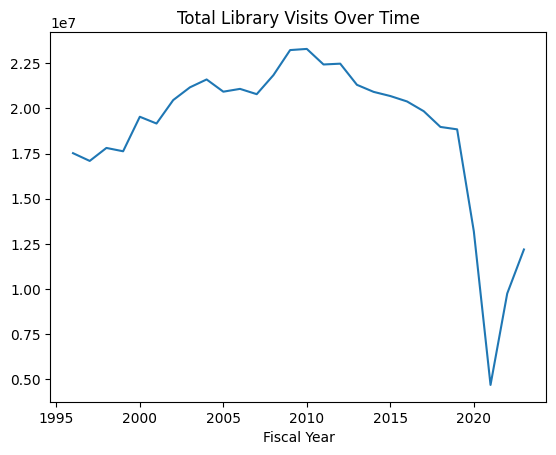

In [22]:
df.groupby("Fiscal Year")["Total Library Visits"].sum().plot(title="Total Library Visits Over Time")

In [24]:
df["Operating Expenditures"] = df["Operating Expenditures"].replace(r'[\$,]', '', regex=True).astype(float)

# Group by 'Fiscal Year' and calculate the average
avg_operating_cost_per_year = df.groupby("Fiscal Year")["Operating Expenditures"].mean().round(2)

# Display the first few results
print(avg_operating_cost_per_year.head())

Fiscal Year
1996    472684.27
1997    506812.95
1998    532974.88
1999    566167.87
2000    666045.37
Name: Operating Expenditures, dtype: float64


In [25]:
# Calculate the overall average operating expenditure across all years
overall_avg_operating_cost = df["Operating Expenditures"].mean().round(2)
print("Overall Average Operating Cost:", overall_avg_operating_cost)

Overall Average Operating Cost: 909472.54


In [26]:
# Filter data for the last 10 years (assuming the most recent year is 2023)
recent_years_df = df[df["Fiscal Year"] >= 2014]

# Calculate the total operating cost over the last 10 years
total_operating_cost_last_10_years = recent_years_df["Operating Expenditures"].sum().round(2)
total_operating_cost_last_10_years

2021999373.16

In [29]:
# Clean the 'Operating Expenditures' column
df["Operating Expenditures"] = df["Operating Expenditures"].replace(r'[\$,]', '', regex=True).astype(float)

# Filter to the last 10 years (2014–2023)
recent_years_df = df[df["Fiscal Year"] >= 2014]

# Group by County and calculate total Operating Expenditures
operating_cost_by_county_last_10_years = (
    recent_years_df.groupby("County")["Operating Expenditures"]
    .sum()
    .round(2)
    .reset_index()
    .sort_values(by="Operating Expenditures", ascending=False)
)

# Display the result
print(operating_cost_by_county_last_10_years)


       County  Operating Expenditures
0   Fairfield            7.233773e+08
1    Hartford            5.226821e+08
4   New Haven            3.626856e+08
5  New London            1.176347e+08
3   Middlesex            1.071051e+08
2  Litchfield            9.452862e+07
6     Tolland            6.141602e+07
7     Windham            3.256994e+07


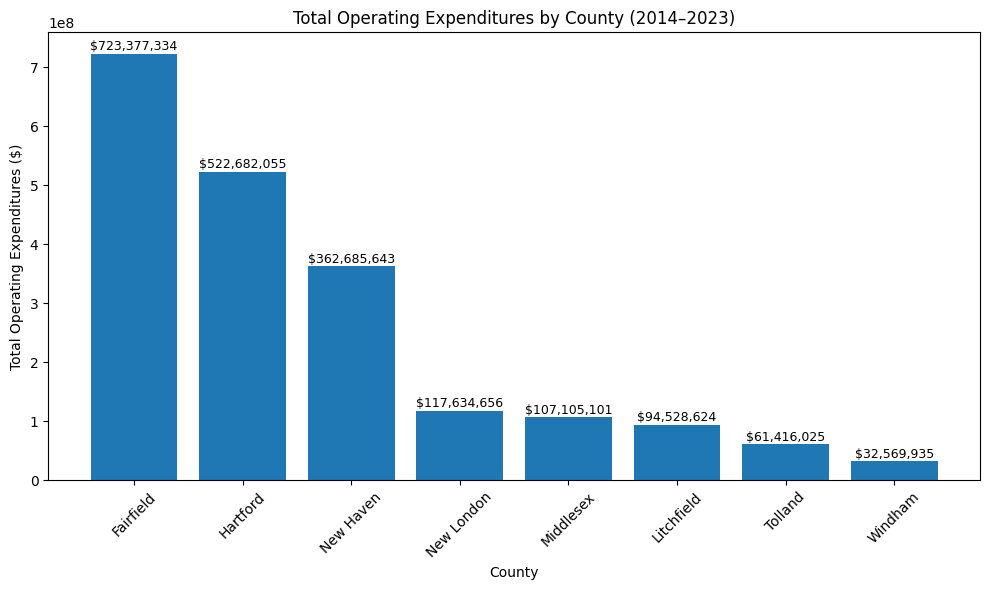

In [33]:
import matplotlib.pyplot as plt

df["Operating Expenditures"] = df["Operating Expenditures"].replace(r'[\$,]', '', regex=True).astype(float)
recent_years_df = df[df["Fiscal Year"] >= 2014]

# Group by County and sum expenditures
operating_cost_by_county_last_10_years = (
    recent_years_df.groupby("County")["Operating Expenditures"]
    .sum()
    .round(2)
    .reset_index()
    .sort_values(by="Operating Expenditures", ascending=False)
)

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(
    operating_cost_by_county_last_10_years["County"],
    operating_cost_by_county_last_10_years["Operating Expenditures"]
)

plt.title("Total Operating Expenditures by County (2014–2023)")
plt.xlabel("County")
plt.ylabel("Total Operating Expenditures ($)")
plt.xticks(rotation=45)

# Add value labels above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1e6, f"${yval:,.0f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

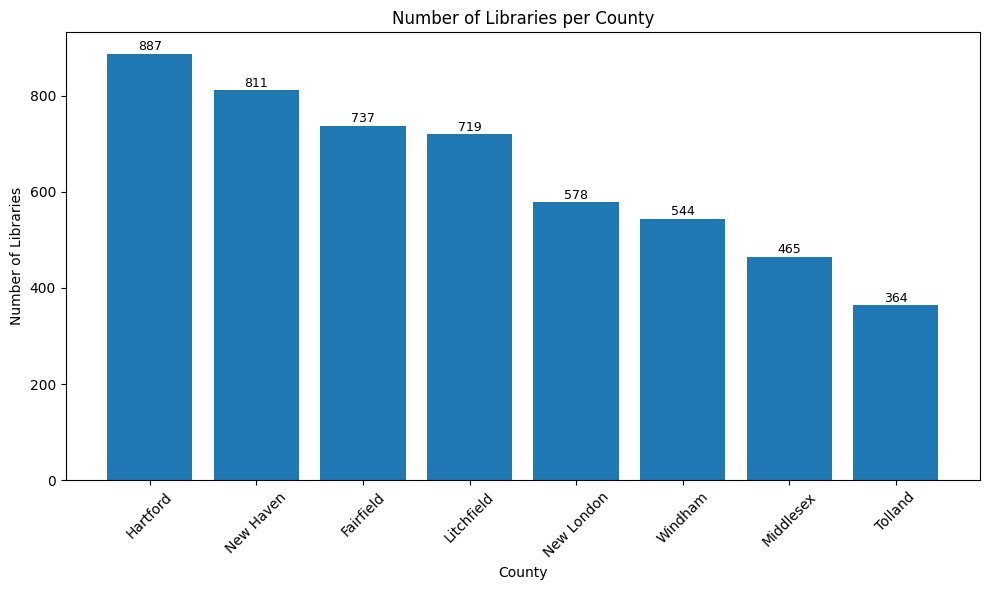

In [35]:
# Count the number of libraries per county
library_counts = df["County"].value_counts().sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(library_counts.index, library_counts.values)

plt.title("Number of Libraries per County")
plt.xlabel("County")
plt.ylabel("Number of Libraries")
plt.xticks(rotation=45)

# Add value labels above bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, int(yval), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


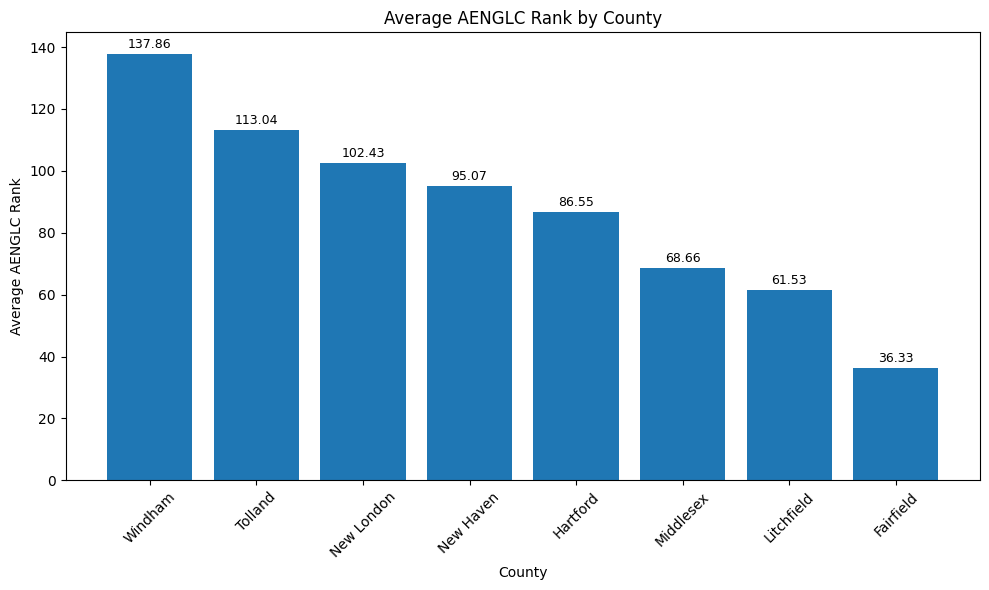

In [36]:
# Drop rows with missing AENGLC Rank or County
df_clean = df.dropna(subset=["AENGLC Rank", "County"])

# Group by County and calculate average AENGLC Rank
aengl_rank_by_county = (
    df_clean.groupby("County")["AENGLC Rank"]
    .mean()
    .round(2)
    .sort_values(ascending=False)
)

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(aengl_rank_by_county.index, aengl_rank_by_county.values)

plt.title("Average AENGLC Rank by County")
plt.xlabel("County")
plt.ylabel("Average AENGLC Rank")
plt.xticks(rotation=45)

# Add value labels above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f"{yval:.2f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


In [37]:
# Drop missing values in both columns
df_corr = df.dropna(subset=["AENGLC Rank", "Total Library Visits"])

# Calculate Pearson correlation
correlation = df_corr["AENGLC Rank"].corr(df_corr["Total Library Visits"])
print(f"Correlation between AENGLC Rank and Total Library Visits: {correlation:.2f}")


Correlation between AENGLC Rank and Total Library Visits: -0.08


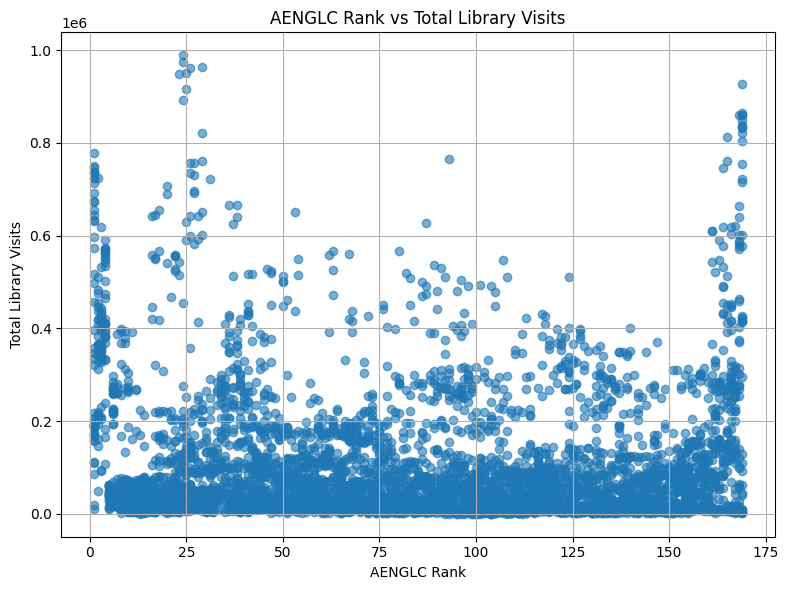

In [38]:
import matplotlib.pyplot as plt

# Drop rows with missing values
df_corr = df.dropna(subset=["AENGLC Rank", "Total Library Visits"])

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_corr["AENGLC Rank"], df_corr["Total Library Visits"], alpha=0.6)
plt.title("AENGLC Rank vs Total Library Visits")
plt.xlabel("AENGLC Rank")
plt.ylabel("Total Library Visits")
plt.grid(True)
plt.tight_layout()
plt.show()


In [39]:
df_grouped = df.dropna(subset=["AENGLC Rank", "Total Library Visits"])
county_avg = df_grouped.groupby("County")[["AENGLC Rank", "Total Library Visits"]].mean().round(2)
print(county_avg.sort_values("AENGLC Rank", ascending=False))


            AENGLC Rank  Total Library Visits
County                                       
Windham          137.90              21844.17
Tolland          113.80              50786.28
New London       103.45              65044.05
New Haven         97.07             119647.15
Hartford          87.74             177317.78
Middlesex         68.65              67531.83
Litchfield        59.85              37445.89
Fairfield         36.71             244398.27


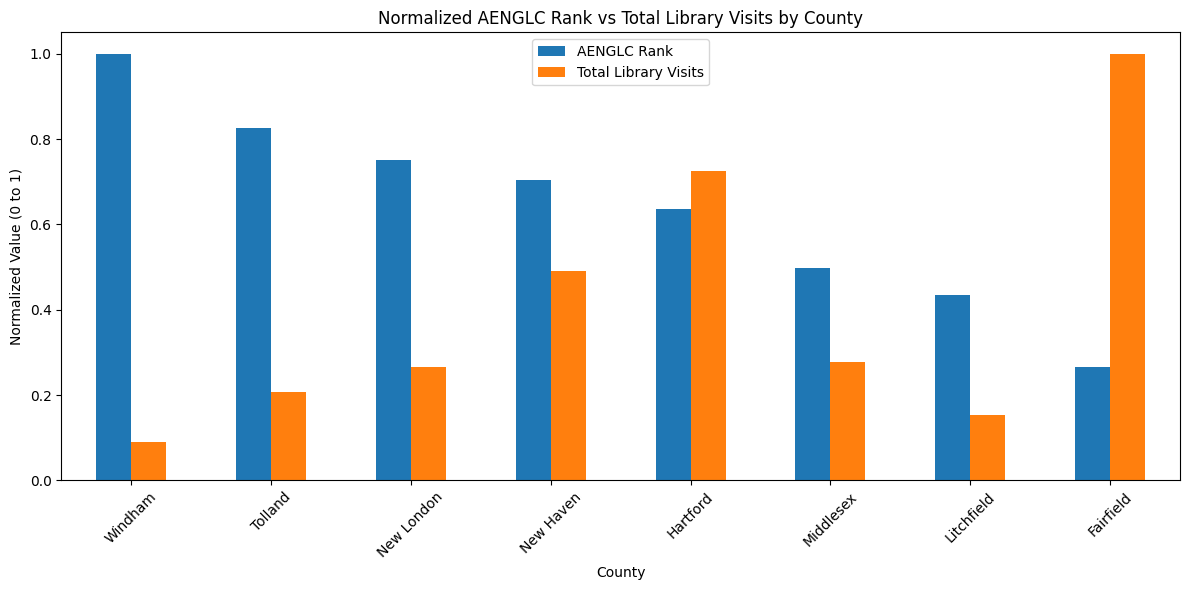

In [41]:
# Drop rows with missing values for the required analysis
df_grouped = df.dropna(subset=["AENGLC Rank", "Total Library Visits", "County"])

# Group by County and calculate averages
county_avg = df_grouped.groupby("County")[["AENGLC Rank", "Total Library Visits"]].mean().round(2)

# Normalize the values for comparison on the same scale
county_avg["AENGLC Rank (normalized)"] = county_avg["AENGLC Rank"] / county_avg["AENGLC Rank"].max()
county_avg["Total Library Visits (normalized)"] = county_avg["Total Library Visits"] / county_avg["Total Library Visits"].max()

# Select normalized data for plotting
plot_data = county_avg[["AENGLC Rank (normalized)", "Total Library Visits (normalized)"]]

# Plot combined bar chart
plot_data.sort_values("AENGLC Rank (normalized)", ascending=False).plot(
    kind="bar", figsize=(12, 6)
)

plt.title("Normalized AENGLC Rank vs Total Library Visits by County")
plt.xlabel("County")
plt.ylabel("Normalized Value (0 to 1)")
plt.xticks(rotation=45)
plt.legend(["AENGLC Rank", "Total Library Visits"])
plt.tight_layout()
plt.show()


In [43]:
# Selecting the relevant columns for tax analysis
tax_columns = [
    "Town Tax Appropriation for Library", 
    "Tax Appropriation Per Capita Served"
]

# Clean and convert the tax-related columns
for col in tax_columns:
    df[col] = df[col].replace(r'[\$,]', '', regex=True).astype(float)

# Group by County and sum the tax contributions
tax_contributions_by_county = df.groupby("County")[tax_columns].sum().round(2).reset_index()

# Display the summarized tax contributions by county
tax_contributions_by_county.head()


,County,Town Tax Appropriation for Library,Tax Appropriation Per Capita Served
0,Fairfield,1.428367e+09,38412.06
1,Hartford,1.102180e+09,34679.25
2,Litchfield,1.347952e+08,19756.18
3,Middlesex,2.082423e+08,17839.60
4,New Haven,7.450995e+08,25904.74


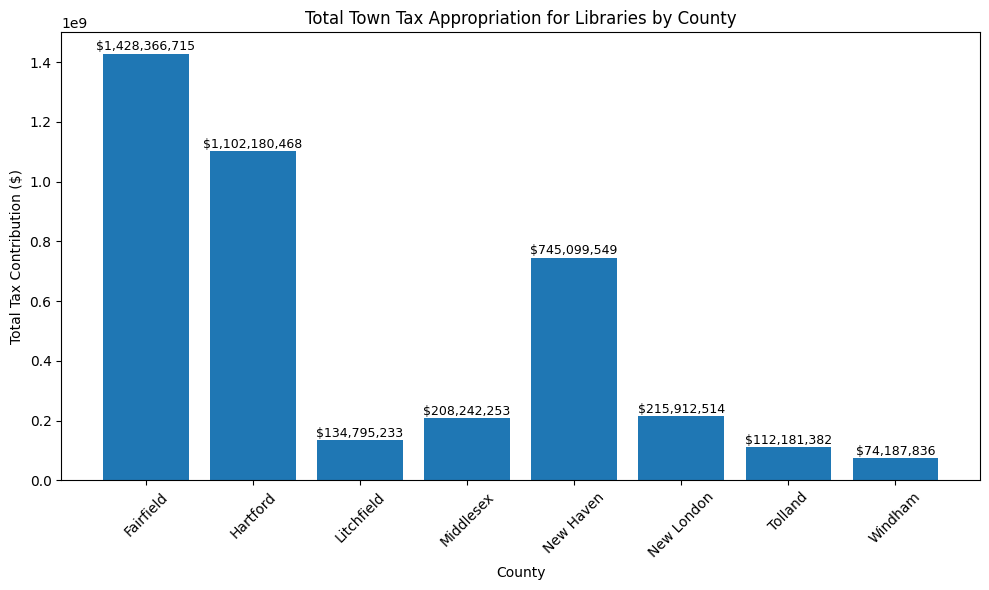

In [44]:
# Plotting the total town tax appropriation for libraries by county
plt.figure(figsize=(10, 6))
bars = plt.bar(
    tax_contributions_by_county["County"],
    tax_contributions_by_county["Town Tax Appropriation for Library"]
)

plt.title("Total Town Tax Appropriation for Libraries by County")
plt.xlabel("County")
plt.ylabel("Total Tax Contribution ($)")
plt.xticks(rotation=45)

# Add value labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1e6, f"${yval:,.0f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


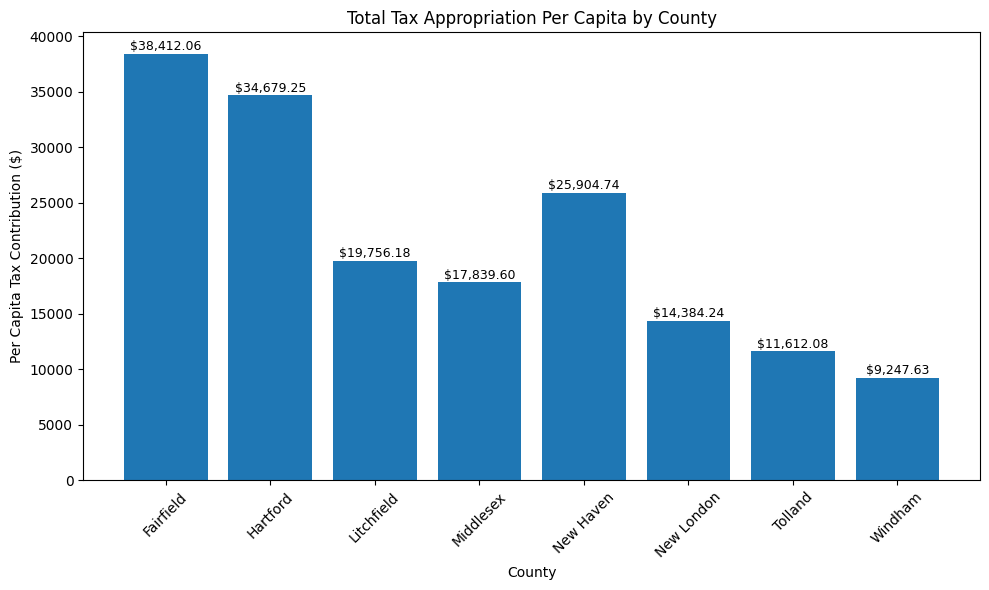

In [45]:
# Plotting tax appropriation per capita by county
plt.figure(figsize=(10, 6))
bars = plt.bar(
    tax_contributions_by_county["County"],
    tax_contributions_by_county["Tax Appropriation Per Capita Served"]
)

plt.title("Total Tax Appropriation Per Capita by County")
plt.xlabel("County")
plt.ylabel("Per Capita Tax Contribution ($)")
plt.xticks(rotation=45)

# Add value labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 50, f"${yval:,.2f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


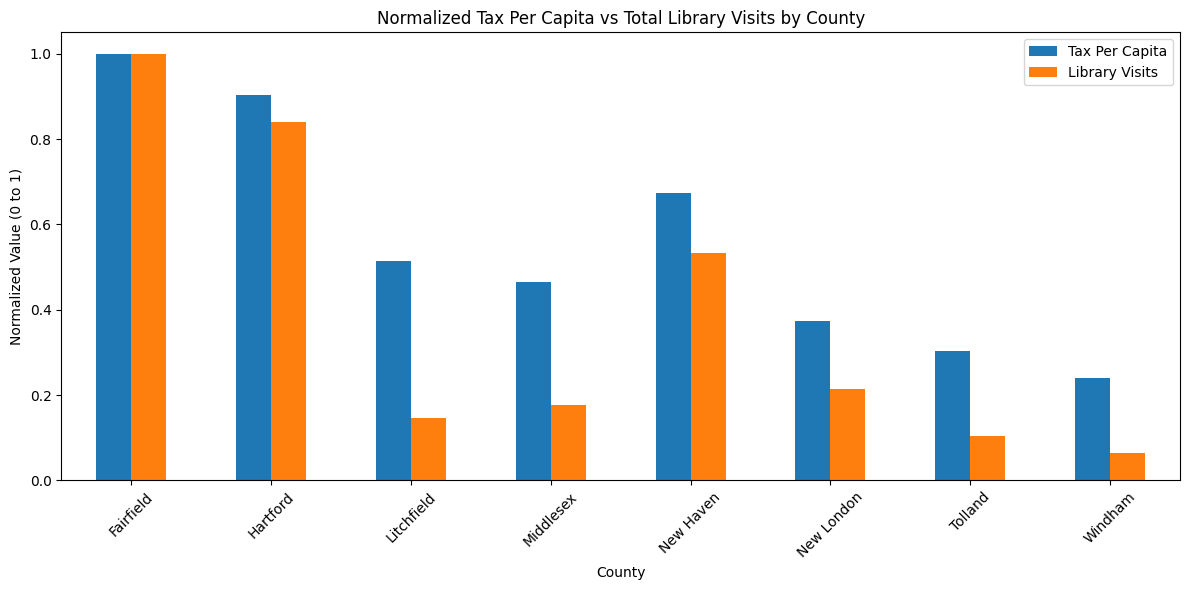

In [46]:
# Ensure Total Library Visits is cleaned and numeric
df["Total Library Visits"] = pd.to_numeric(df["Total Library Visits"], errors='coerce')

# Group by County and sum total visits
library_visits_by_county = df.groupby("County")["Total Library Visits"].sum().round(2).reset_index()

# Merge with tax data for combined comparison
usage_tax_df = pd.merge(
    tax_contributions_by_county,
    library_visits_by_county,
    on="County"
)

# Normalize for comparison
usage_tax_df["Tax Per Capita (normalized)"] = usage_tax_df["Tax Appropriation Per Capita Served"] / usage_tax_df["Tax Appropriation Per Capita Served"].max()
usage_tax_df["Library Visits (normalized)"] = usage_tax_df["Total Library Visits"] / usage_tax_df["Total Library Visits"].max()

# Prepare data for plotting
plot_data = usage_tax_df[["County", "Tax Per Capita (normalized)", "Library Visits (normalized)"]]
plot_data.set_index("County", inplace=True)

# Plot combined bar chart
plot_data.plot(kind="bar", figsize=(12, 6))
plt.title("Normalized Tax Per Capita vs Total Library Visits by County")
plt.xlabel("County")
plt.ylabel("Normalized Value (0 to 1)")
plt.xticks(rotation=45)
plt.legend(["Tax Per Capita", "Library Visits"])
plt.tight_layout()
plt.show()


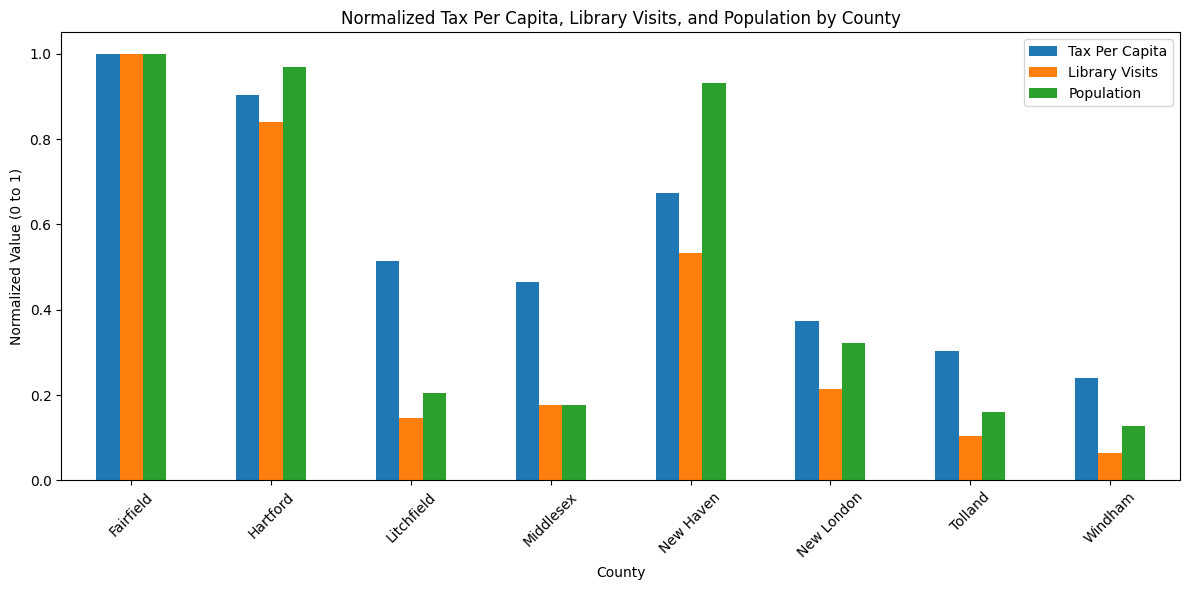

In [47]:
# Ensure Population of Service Area is numeric
df["Population of Service Area"] = pd.to_numeric(df["Population of Service Area"], errors='coerce')

# Group by County and sum population
population_by_county = df.groupby("County")["Population of Service Area"].sum().round(2).reset_index()

# Merge with existing usage + tax DataFrame
full_df = pd.merge(usage_tax_df, population_by_county, on="County")

# Normalize for comparison
full_df["Population (normalized)"] = full_df["Population of Service Area"] / full_df["Population of Service Area"].max()

# Select relevant columns for plotting
plot_data = full_df[["County", "Tax Per Capita (normalized)", "Library Visits (normalized)", "Population (normalized)"]]
plot_data.set_index("County", inplace=True)

# Plot combined bar chart
plot_data.plot(kind="bar", figsize=(12, 6))
plt.title("Normalized Tax Per Capita, Library Visits, and Population by County")
plt.xlabel("County")
plt.ylabel("Normalized Value (0 to 1)")
plt.xticks(rotation=45)
plt.legend(["Tax Per Capita", "Library Visits", "Population"])
plt.tight_layout()
plt.show()


In [48]:
# Calculate cost per visit: total tax / total visits per county
full_df["Cost Per Visit"] = full_df["Town Tax Appropriation for Library"] / full_df["Total Library Visits"]
full_df["Cost Per Visit"] = full_df["Cost Per Visit"].round(2)

# Sort by cost per visit to identify most and least expensive counties
cost_per_visit_sorted = full_df[["County", "Cost Per Visit"]].sort_values(by="Cost Per Visit")

# Display the sorted results
cost_per_visit_sorted.reset_index(drop=True).head(10)  # Top 10 best value counties


,County,Cost Per Visit
0,Litchfield,5.38
1,New London,5.90
2,Tolland,6.26
3,Windham,6.63
4,Middlesex,6.82
5,Hartford,7.64
6,New Haven,8.15
7,Fairfield,8.31


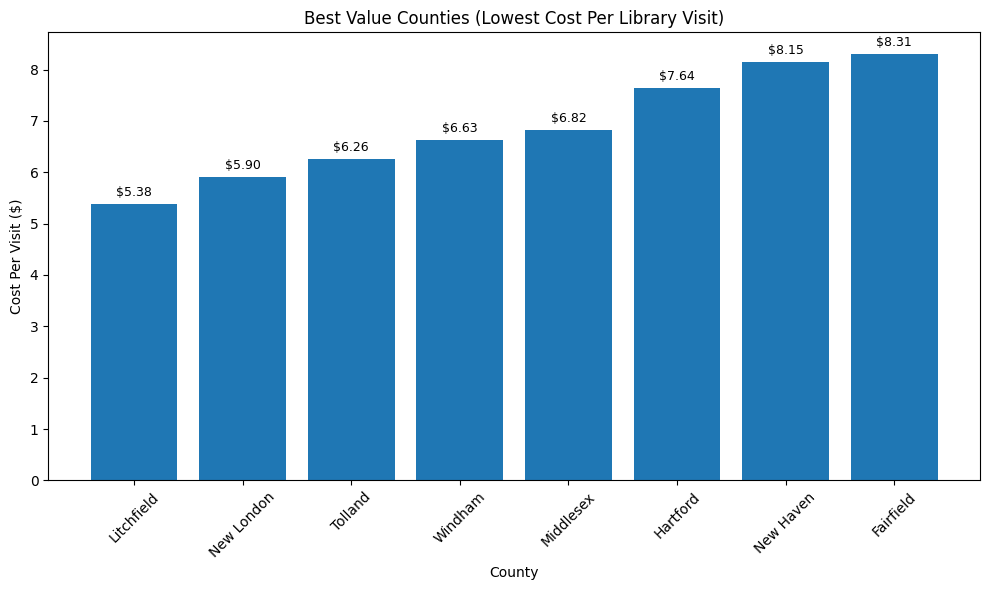

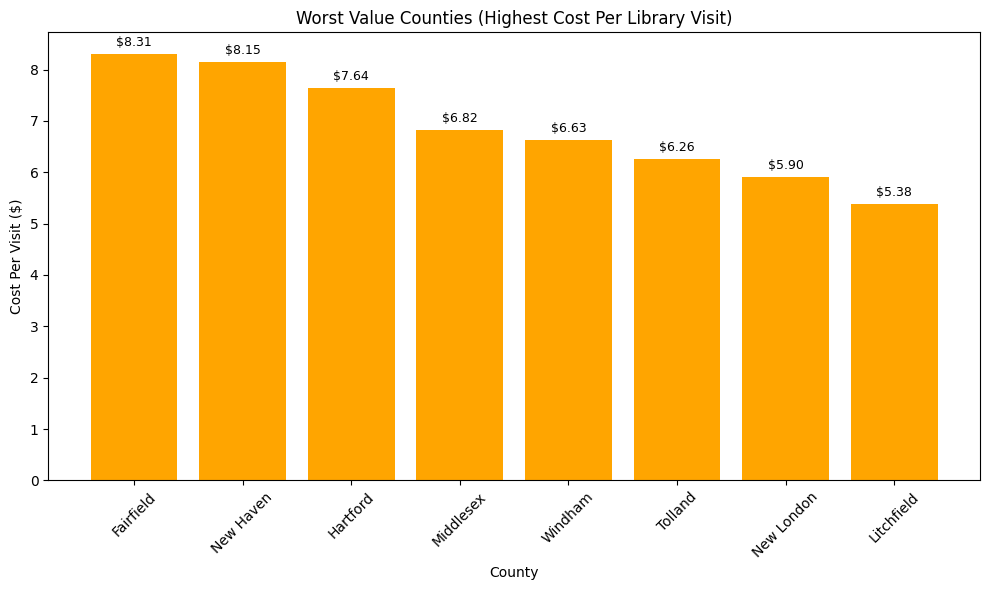

In [49]:
# Plot bar chart for best value counties (lowest cost per visit)
best_value_df = cost_per_visit_sorted.head(8)

plt.figure(figsize=(10, 6))
bars = plt.bar(best_value_df["County"], best_value_df["Cost Per Visit"])
plt.title("Best Value Counties (Lowest Cost Per Library Visit)")
plt.xlabel("County")
plt.ylabel("Cost Per Visit ($)")
plt.xticks(rotation=45)

# Add value labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, f"${yval:.2f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Now prepare and show worst value counties (highest cost per visit)
worst_value_df = cost_per_visit_sorted.sort_values(by="Cost Per Visit", ascending=False).head(8)

plt.figure(figsize=(10, 6))
bars = plt.bar(worst_value_df["County"], worst_value_df["Cost Per Visit"], color='orange')
plt.title("Worst Value Counties (Highest Cost Per Library Visit)")
plt.xlabel("County")
plt.ylabel("Cost Per Visit ($)")
plt.xticks(rotation=45)

# Add value labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, f"${yval:.2f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


In [51]:
# Extract the worst value counties again
worst_value_counties = worst_value_df["County"].tolist()

# Filter the full dataset for just those counties
worst_details = full_df[full_df["County"].isin(worst_value_counties)]

# Calculate metrics for comparison
comparison_df = worst_details[[
    "County",
    "Town Tax Appropriation for Library",
    "Total Library Visits",
    "Population of Service Area",
    "Tax Appropriation Per Capita Served",
    "Cost Per Visit"
]].round(2).sort_values(by="Cost Per Visit", ascending=False)

# Display the detailed comparison
from IPython.display import display
display(comparison_df)



,County,Town Tax Appropriation for Library,Total Library Visits,Population of Service Area,Tax Appropriation Per Capita Served,Cost Per Visit
0,Fairfield,1.428367e+09,171869286.0,25324698.0,38412.06,8.31
4,New Haven,7.450995e+08,91464650.0,23565112.0,25904.74,8.15
1,Hartford,1.102180e+09,144233731.0,24505598.0,34679.25,7.64
3,Middlesex,2.082423e+08,30514515.0,4500567.0,17839.60,6.82
7,Windham,7.418784e+07,11196141.0,3233361.0,9247.63,6.63
6,Tolland,1.121814e+08,17927557.0,4077204.0,11612.08,6.26
5,New London,2.159125e+08,36622462.0,8143300.0,14384.24,5.90
2,Litchfield,1.347952e+08,25050944.0,5166287.0,19756.18,5.38


In [52]:
# Calculate usage efficiency: visits per capita
full_df["Visits Per Capita"] = full_df["Total Library Visits"] / full_df["Population of Service Area"]
full_df["Visits Per Capita"] = full_df["Visits Per Capita"].round(2)

# Extract worst value counties for comparison on usage basis
usage_comparison = full_df[full_df["County"].isin(worst_value_counties)][
    ["County", "Visits Per Capita", "Cost Per Visit", "Tax Appropriation Per Capita Served"]
].sort_values(by="Visits Per Capita", ascending=False)

usage_comparison.reset_index(drop=True, inplace=True)
usage_comparison


,County,Visits Per Capita,Cost Per Visit,Tax Appropriation Per Capita Served
0,Fairfield,6.79,8.31,38412.06
1,Middlesex,6.78,6.82,17839.60
2,Hartford,5.89,7.64,34679.25
3,Litchfield,4.85,5.38,19756.18
4,New London,4.50,5.90,14384.24
5,Tolland,4.40,6.26,11612.08
6,New Haven,3.88,8.15,25904.74
7,Windham,3.46,6.63,9247.63


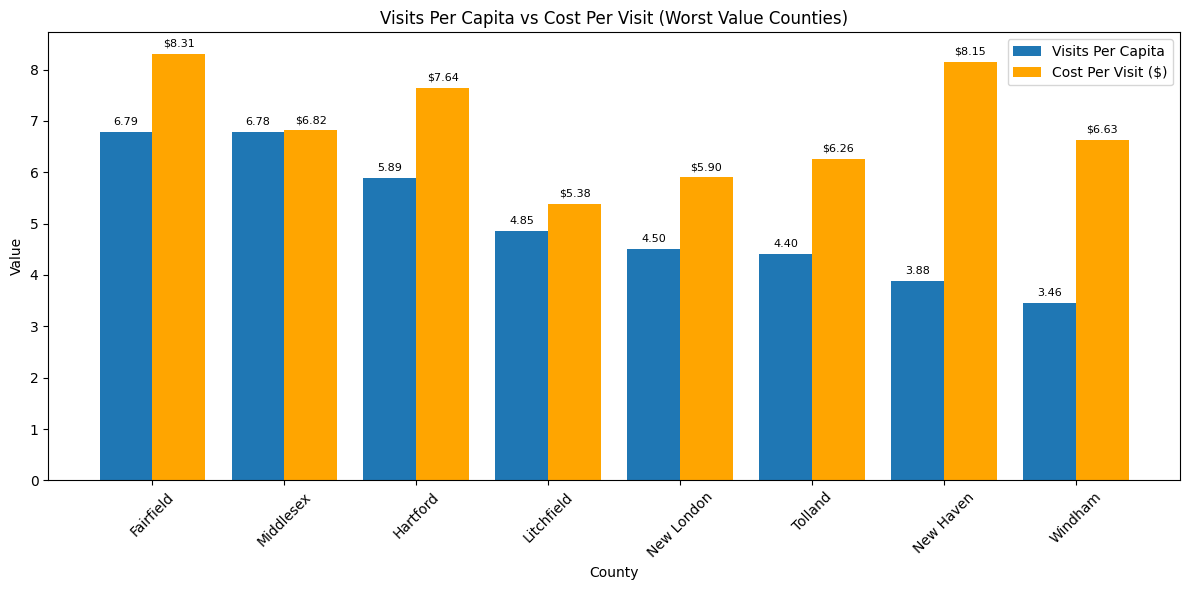

In [55]:
# Plot with value labels on bars
plt.figure(figsize=(12, 6))

# Bar width and positions
bar_width = 0.4
x = range(len(usage_comparison))
x1 = [i - bar_width/2 for i in x]
x2 = [i + bar_width/2 for i in x]

# Plot bars
bars1 = plt.bar(x1, usage_comparison["Visits Per Capita"], width=bar_width, label="Visits Per Capita")
bars2 = plt.bar(x2, usage_comparison["Cost Per Visit"], width=bar_width, label="Cost Per Visit ($)", color="orange")

# Add value labels
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, f"{yval:.2f}", ha='center', va='bottom', fontsize=8)

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, f"${yval:.2f}", ha='center', va='bottom', fontsize=8)

# Final formatting
plt.xticks(ticks=x, labels=usage_comparison["County"], rotation=45)
plt.title("Visits Per Capita vs Cost Per Visit (Worst Value Counties)")
plt.xlabel("County")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.show()



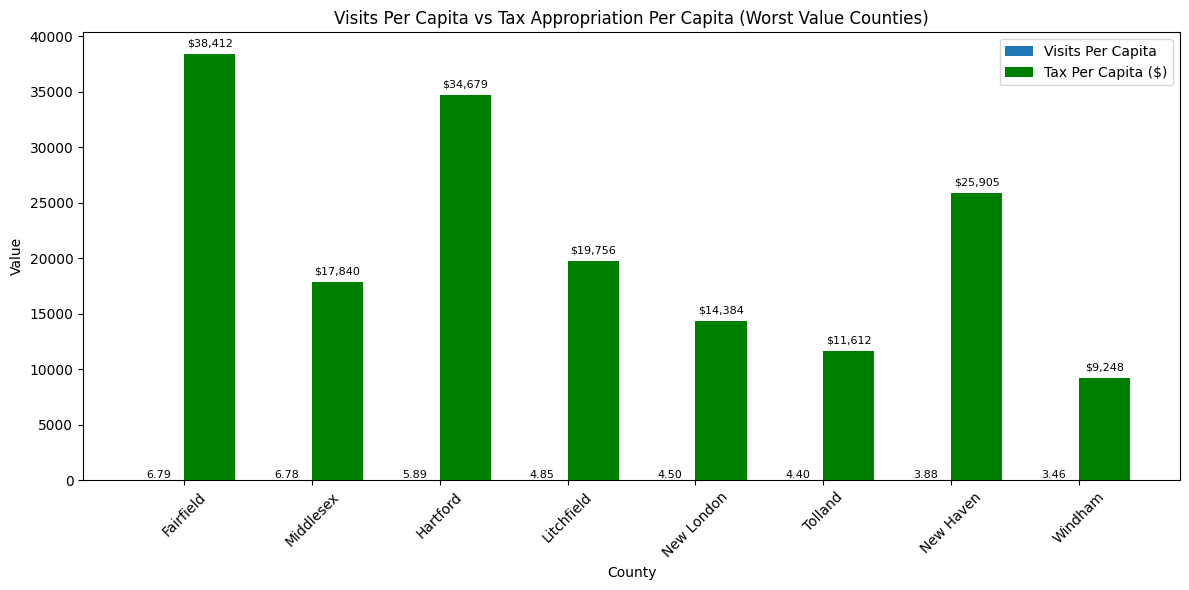

In [56]:
# Prepare data for side-by-side comparison: Visits Per Capita vs Cost Per Capita
cost_per_capita_df = full_df[full_df["County"].isin(worst_value_counties)][
    ["County", "Visits Per Capita", "Tax Appropriation Per Capita Served"]
].sort_values(by="Visits Per Capita", ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
bar_width = 0.4
x = range(len(cost_per_capita_df))
x1 = [i - bar_width/2 for i in x]
x2 = [i + bar_width/2 for i in x]

bars1 = plt.bar(x1, cost_per_capita_df["Visits Per Capita"], width=bar_width, label="Visits Per Capita")
bars2 = plt.bar(x2, cost_per_capita_df["Tax Appropriation Per Capita Served"], width=bar_width, label="Tax Per Capita ($)", color="green")

# Add value labels
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, f"{yval:.2f}", ha='center', va='bottom', fontsize=8)

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 500, f"${yval:,.0f}", ha='center', va='bottom', fontsize=8)

# Final formatting
plt.xticks(ticks=x, labels=cost_per_capita_df["County"], rotation=45)
plt.title("Visits Per Capita vs Tax Appropriation Per Capita (Worst Value Counties)")
plt.xlabel("County")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.show()


In [57]:
# Calculate Return on Investment (ROI)-like metric: Visits per Dollar of Tax Per Capita
full_df["Visits per Dollar Taxed"] = full_df["Visits Per Capita"] / full_df["Tax Appropriation Per Capita Served"]
full_df["Visits per Dollar Taxed"] = full_df["Visits per Dollar Taxed"].round(4)

# Extract and sort worst-value counties by ROI
roi_comparison = full_df[full_df["County"].isin(worst_value_counties)][
    ["County", "Visits Per Capita", "Tax Appropriation Per Capita Served", "Visits per Dollar Taxed"]
].sort_values(by="Visits per Dollar Taxed", ascending=False)

roi_comparison.reset_index(drop=True, inplace=True)
roi_comparison


,County,Visits Per Capita,Tax Appropriation Per Capita Served,Visits per Dollar Taxed
0,Middlesex,6.78,17839.60,0.0004
1,Tolland,4.40,11612.08,0.0004
2,Windham,3.46,9247.63,0.0004
3,New London,4.50,14384.24,0.0003
4,Fairfield,6.79,38412.06,0.0002
5,Hartford,5.89,34679.25,0.0002
6,Litchfield,4.85,19756.18,0.0002
7,New Haven,3.88,25904.74,0.0001


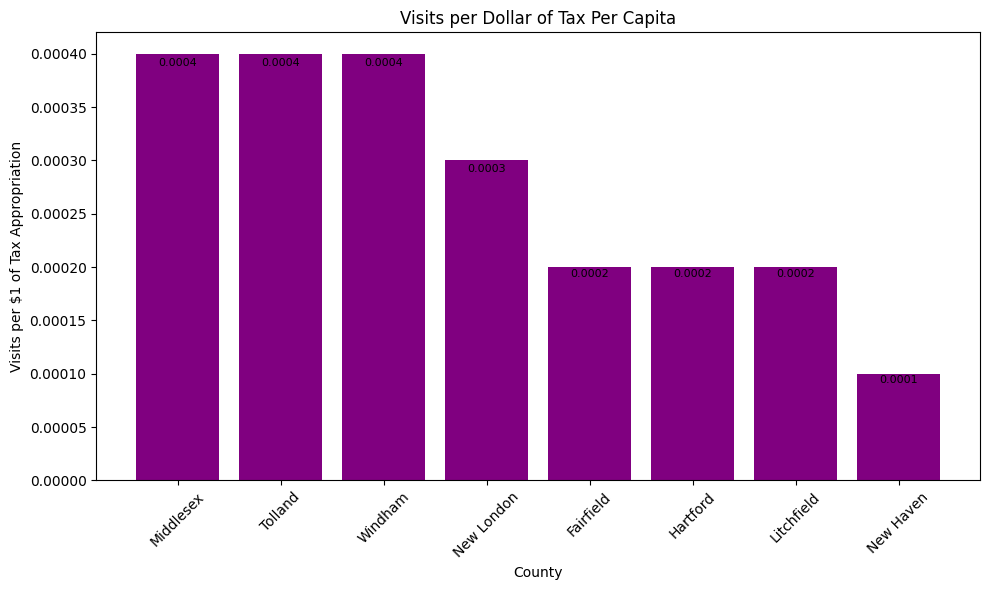

In [62]:
# Plot ROI (Visits per Dollar Taxed) with tighter label placement
plt.figure(figsize=(10, 6))
bars = plt.bar(roi_comparison["County"], roi_comparison["Visits per Dollar Taxed"], color="purple")

plt.title("Visits per Dollar of Tax Per Capita")
plt.xlabel("County")
plt.ylabel("Visits per $1 of Tax Appropriation")
plt.xticks(rotation=45)

# Add value labels slightly below the top of the bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval * 0.99, f"{yval:.4f}", ha='center', va='top', fontsize=8)

plt.tight_layout()
plt.show()



In [63]:
# Calculate the average usage per capita across all counties
average_visits_per_capita = full_df["Visits Per Capita"].mean().round(2)
average_visits_per_capita


5.07

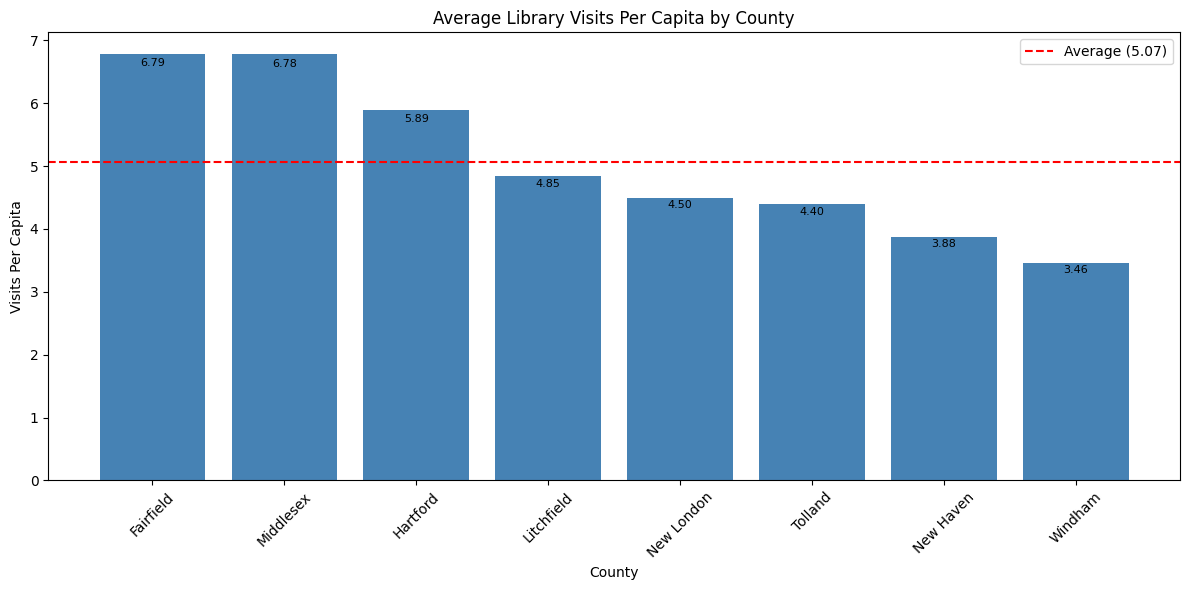

In [64]:
# Group by county and calculate average visits per capita
visits_per_capita_by_county = full_df.groupby("County")["Visits Per Capita"].mean().round(2).reset_index()

# Sort for visualization
visits_per_capita_by_county = visits_per_capita_by_county.sort_values(by="Visits Per Capita", ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
bars = plt.bar(visits_per_capita_by_county["County"], visits_per_capita_by_county["Visits Per Capita"], color="steelblue")

# Add average reference line
plt.axhline(y=average_visits_per_capita, color='red', linestyle='--', linewidth=1.5, label=f"Average ({average_visits_per_capita})")

# Add value labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval * 0.99, f"{yval:.2f}", ha='center', va='top', fontsize=8)

# Final formatting
plt.title("Average Library Visits Per Capita by County")
plt.xlabel("County")
plt.ylabel("Visits Per Capita")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


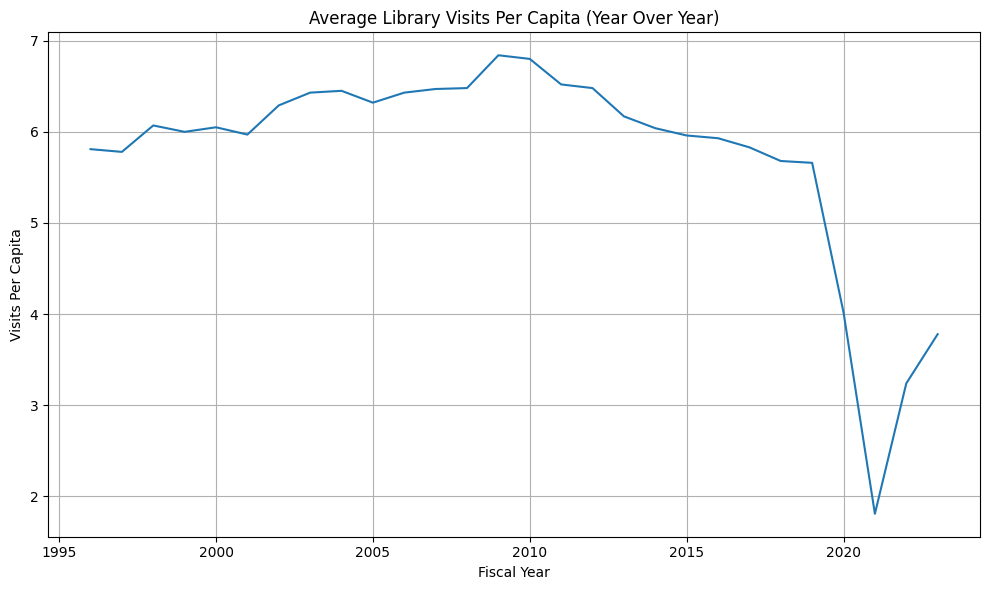

In [70]:
# Drop rows with missing values needed for year-over-year analysis
yearly_df = df.dropna(subset=["Fiscal Year", "Total Library Visits", "Population of Service Area"]).copy()

# Calculate visits per capita for each row
yearly_df.loc[:, "Visits Per Capita"] = yearly_df["Total Library Visits"] / yearly_df["Population of Service Area"]

# Group by year and compute the average visits per capita
visits_per_capita_by_year = (
    yearly_df.groupby("Fiscal Year")["Visits Per Capita"]
    .mean()
    .round(2)
    .reset_index()
)

# Plotting the trend
plt.figure(figsize=(10, 6))
plt.plot(visits_per_capita_by_year["Fiscal Year"], visits_per_capita_by_year["Visits Per Capita"])

plt.title("Average Library Visits Per Capita (Year Over Year)")
plt.xlabel("Fiscal Year")
plt.ylabel("Visits Per Capita")
plt.grid(True)
plt.tight_layout()
plt.show()


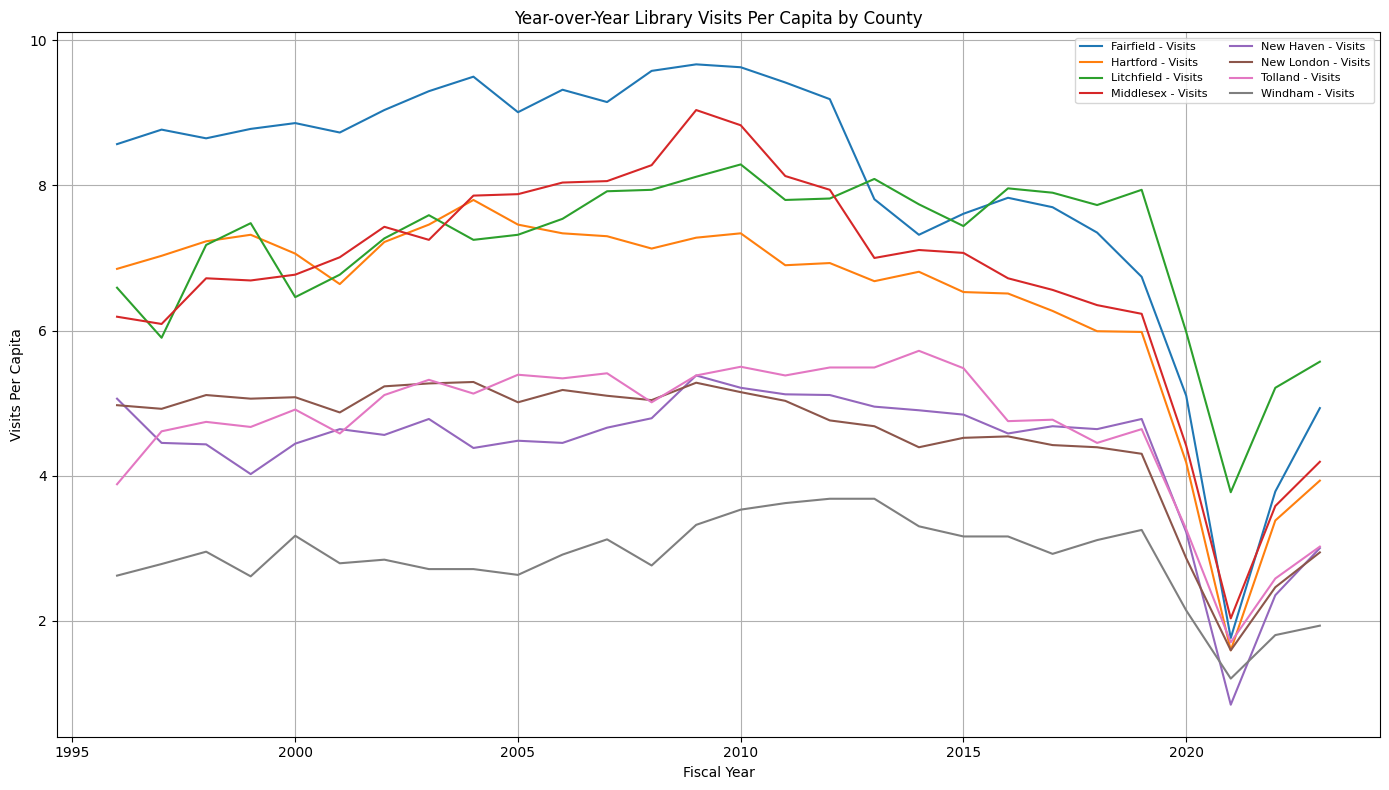

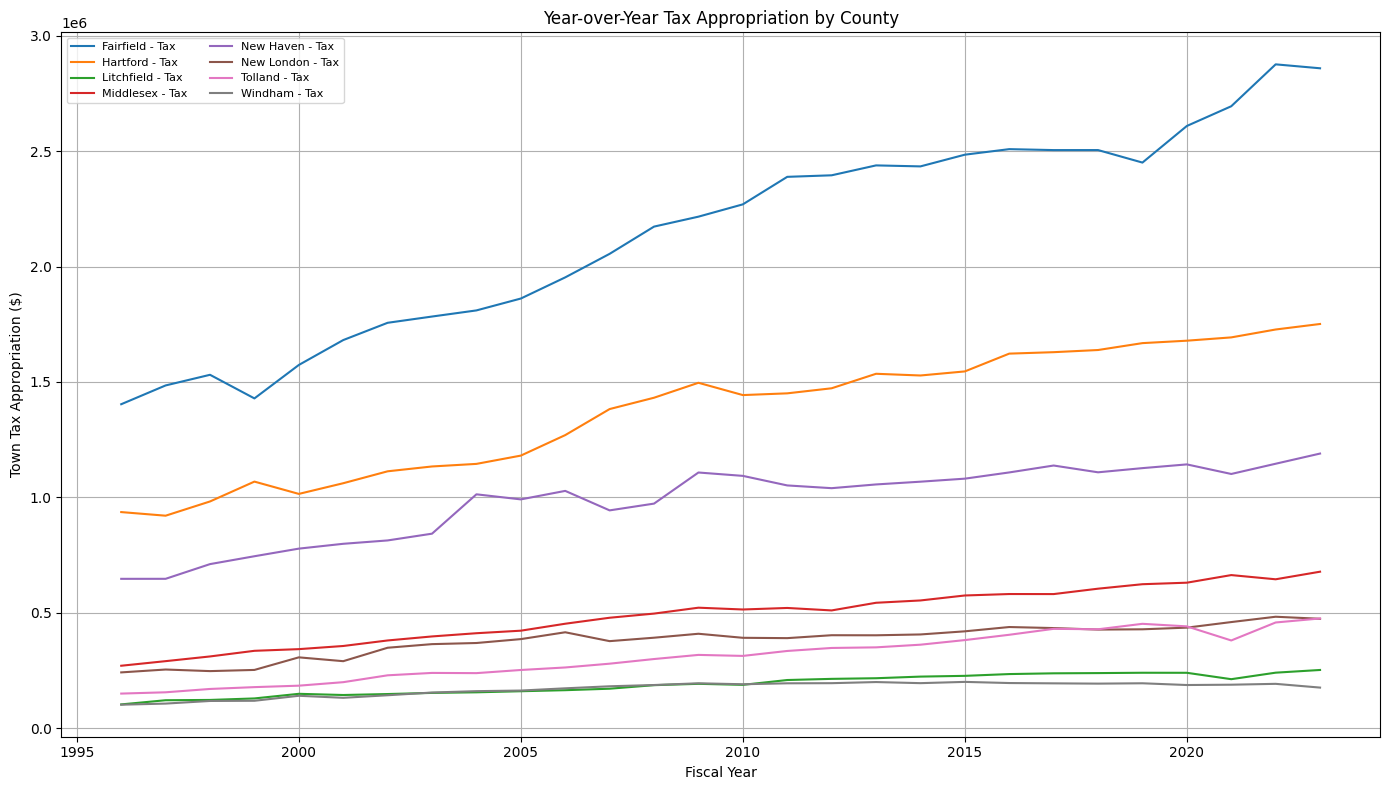

In [72]:
# Create a cleaned DataFrame with required columns and no missing values
yearly_county_df = df.dropna(subset=[
    "Fiscal Year", "County", "Total Library Visits", "Population of Service Area", "Town Tax Appropriation for Library"
]).copy()

# Calculate Visits Per Capita
yearly_county_df["Visits Per Capita"] = yearly_county_df["Total Library Visits"] / yearly_county_df["Population of Service Area"]

# Group by Fiscal Year and County, then compute averages
yearly_summary = yearly_county_df.groupby(["Fiscal Year", "County"]).agg({
    "Visits Per Capita": "mean",
    "Town Tax Appropriation for Library": "mean"
}).round(2).reset_index()

# Plotting for each county
counties = yearly_summary["County"].unique()
plt.figure(figsize=(14, 8))

for county in counties:
    county_data = yearly_summary[yearly_summary["County"] == county]
    plt.plot(county_data["Fiscal Year"], county_data["Visits Per Capita"], label=f"{county} - Visits")

plt.title("Year-over-Year Library Visits Per Capita by County")
plt.xlabel("Fiscal Year")
plt.ylabel("Visits Per Capita")
plt.legend(ncol=2, fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.show()

# Overlay Tax Spending
plt.figure(figsize=(14, 8))

for county in counties:
    county_data = yearly_summary[yearly_summary["County"] == county]
    plt.plot(county_data["Fiscal Year"], county_data["Town Tax Appropriation for Library"], label=f"{county} - Tax")

plt.title("Year-over-Year Tax Appropriation by County")
plt.xlabel("Fiscal Year")
plt.ylabel("Town Tax Appropriation ($)")
plt.legend(ncol=2, fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.show()


In [75]:
# Ensure the necessary columns are numeric
df["Population of Service Area"] = pd.to_numeric(df["Population of Service Area"], errors="coerce")
df["Percent of Residents with Library Cards"] = pd.to_numeric(df["Percent of Residents with Library Cards"], errors="coerce")

# Drop rows with missing values in relevant columns
card_df = df.dropna(subset=["Population of Service Area", "Percent of Residents with Library Cards"]).copy()

# Calculate population with and without library cards
card_df["With Library Card"] = (card_df["Population of Service Area"] * card_df["Percent of Residents with Library Cards"]).round(0)
card_df["Without Library Card"] = (card_df["Population of Service Area"] - card_df["With Library Card"]).round(0)

# Sum totals across the dataset
total_with_card = int(card_df["With Library Card"].sum())
total_without_card = int(card_df["Without Library Card"].sum())

total_with_card, total_without_card


(45878144, 51761590)

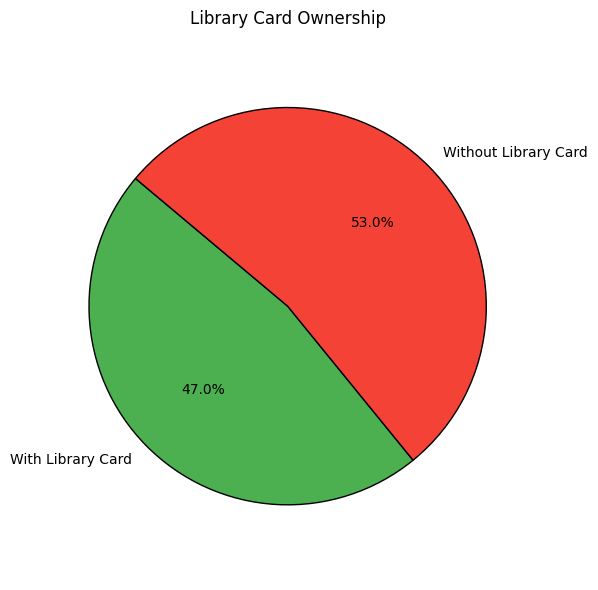

In [78]:
# Pie chart: With vs Without Library Cards
plt.figure(figsize=(6, 6))
plt.pie(
    [total_with_card, total_without_card],
    labels=["With Library Card", "Without Library Card"],
    autopct="%1.1f%%",
    startangle=140,
    colors=["#4CAF50", "#F44336"],
    wedgeprops={'edgecolor': 'black'}
)
plt.title("Library Card Ownership")
plt.axis("equal")
plt.tight_layout()
plt.show()

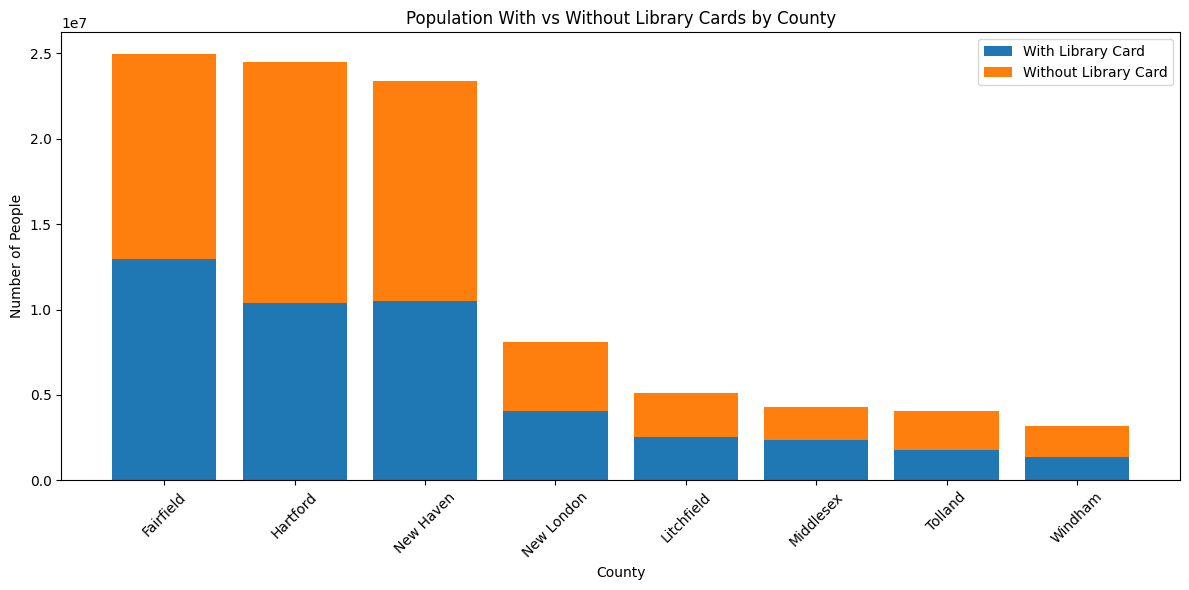

In [80]:
# Group by County and calculate total population with and without library cards
county_card_df = card_df.groupby("County").agg({
    "Population of Service Area": "sum",
    "With Library Card": "sum",
    "Without Library Card": "sum"
}).round(0).reset_index()

# Sort by population for clearer visualization
county_card_df = county_card_df.sort_values(by="Population of Service Area", ascending=False)

# Plotting stacked bar chart with blue and a complementary orange
plt.figure(figsize=(12, 6))
plt.bar(county_card_df["County"], county_card_df["With Library Card"], label="With Library Card", color="#1f77b4")  # blue
plt.bar(county_card_df["County"], county_card_df["Without Library Card"],
        bottom=county_card_df["With Library Card"], label="Without Library Card", color="#ff7f0e")  # orange

# Final formatting
plt.title("Population With vs Without Library Cards by County")
plt.xlabel("County")
plt.ylabel("Number of People")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [82]:
# Calculate usage (visits per capita) and percent with cards per county
usage_card_df = card_df.groupby("County").agg({
    "Total Library Visits": "sum",
    "Population of Service Area": "sum",
    "With Library Card": "sum"
}).reset_index()

# Compute percent with cards and visits per capita
usage_card_df["Percent with Library Card"] = usage_card_df["With Library Card"] / usage_card_df["Population of Service Area"]
usage_card_df["Visits Per Capita"] = usage_card_df["Total Library Visits"] / usage_card_df["Population of Service Area"]

# Calculate correlation
correlation = usage_card_df["Percent with Library Card"].corr(usage_card_df["Visits Per Capita"])
correlation


0.6111818674795994

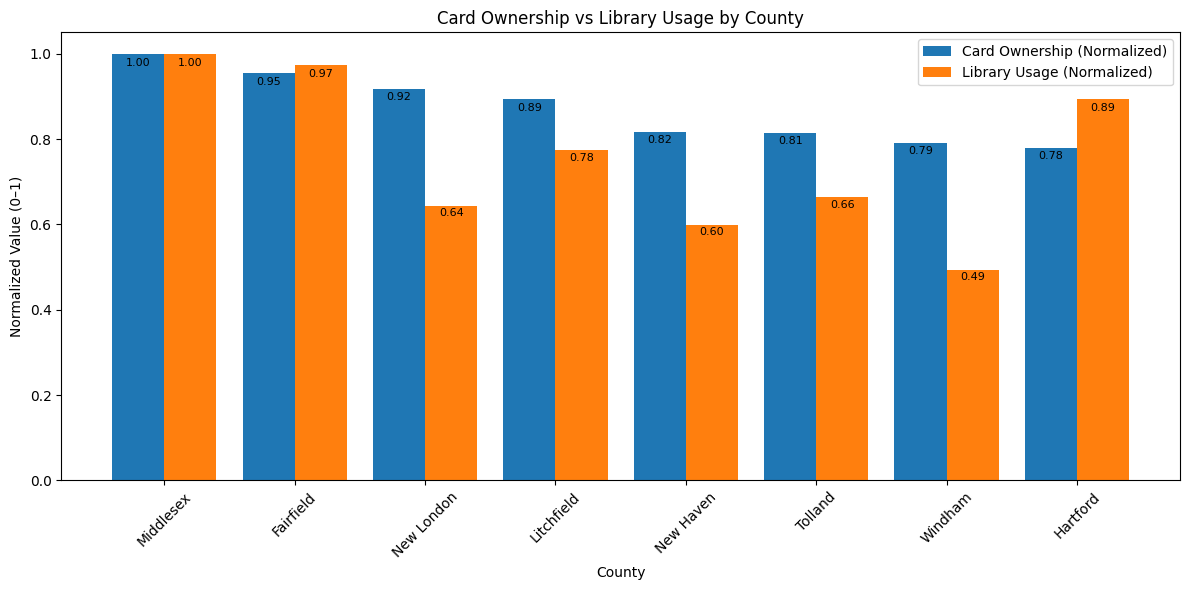

In [86]:
# Recreate the necessary DataFrame for normalization if it's lost due to kernel reset
# Ensure required data is recalculated
df["Population of Service Area"] = pd.to_numeric(df["Population of Service Area"], errors="coerce")
df["Percent of Residents with Library Cards"] = pd.to_numeric(df["Percent of Residents with Library Cards"], errors="coerce")
df["Total Library Visits"] = pd.to_numeric(df["Total Library Visits"], errors="coerce")

card_df = df.dropna(subset=["Population of Service Area", "Percent of Residents with Library Cards", "Total Library Visits"]).copy()
card_df["With Library Card"] = (card_df["Population of Service Area"] * card_df["Percent of Residents with Library Cards"]).round(0)

usage_card_df = card_df.groupby("County").agg({
    "Total Library Visits": "sum",
    "Population of Service Area": "sum",
    "With Library Card": "sum"
}).reset_index()

usage_card_df["Percent with Library Card"] = usage_card_df["With Library Card"] / usage_card_df["Population of Service Area"]
usage_card_df["Visits Per Capita"] = usage_card_df["Total Library Visits"] / usage_card_df["Population of Service Area"]

# Sort and normalize
usage_card_df_sorted = usage_card_df.sort_values(by="Percent with Library Card", ascending=False).copy()
usage_card_df_sorted["Percent with Library Card (normalized)"] = usage_card_df_sorted["Percent with Library Card"] / usage_card_df_sorted["Percent with Library Card"].max()
usage_card_df_sorted["Visits Per Capita (normalized)"] = usage_card_df_sorted["Visits Per Capita"] / usage_card_df_sorted["Visits Per Capita"].max()

# Plot normalized dual bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
bar_width = 0.4
x = range(len(usage_card_df_sorted))
x1 = [i - bar_width / 2 for i in x]
x2 = [i + bar_width / 2 for i in x]

bars1 = plt.bar(x1, usage_card_df_sorted["Percent with Library Card (normalized)"], width=bar_width, label="Card Ownership (Normalized)", color="#1f77b4")
bars2 = plt.bar(x2, usage_card_df_sorted["Visits Per Capita (normalized)"], width=bar_width, label="Library Usage (Normalized)", color="#ff7f0e")

# Add value labels
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval * 0.99, f"{yval:.2f}", ha='center', va='top', fontsize=8)

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval * 0.99, f"{yval:.2f}", ha='center', va='top', fontsize=8)

# Final formatting
plt.xticks(ticks=x, labels=usage_card_df_sorted["County"], rotation=45)
plt.title("Card Ownership vs Library Usage by County")
plt.xlabel("County")
plt.ylabel("Normalized Value (0–1)")
plt.legend()
plt.tight_layout()
plt.show()


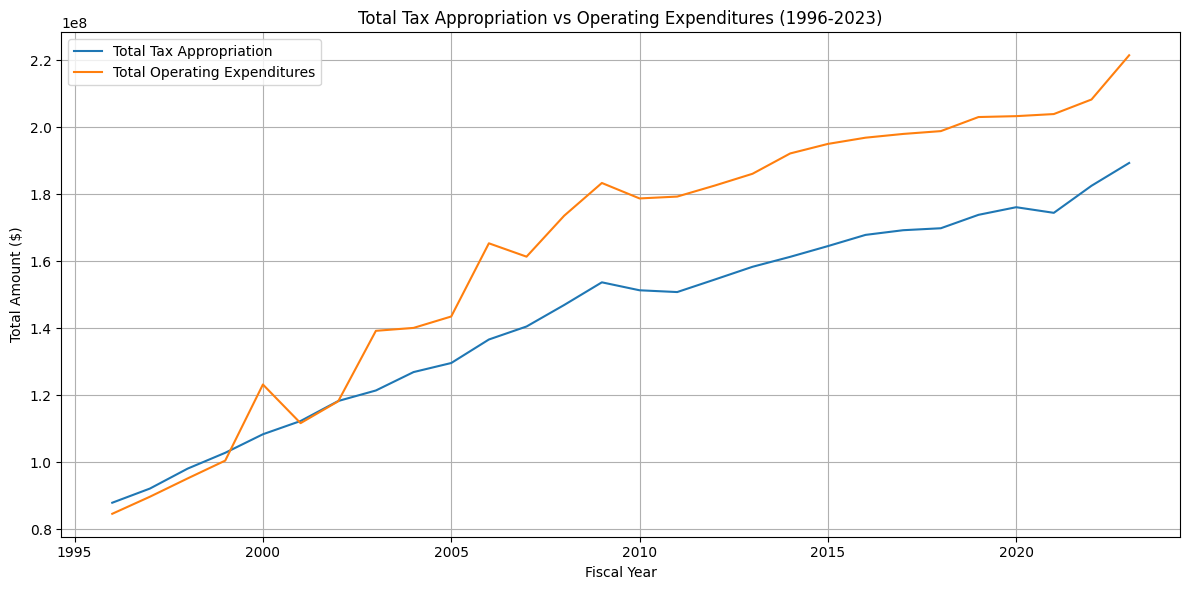

In [90]:
# Ensure numeric columns
df["Town Tax Appropriation for Library"] = pd.to_numeric(df["Town Tax Appropriation for Library"], errors="coerce")
df["Operating Expenditures"] = pd.to_numeric(df["Operating Expenditures"], errors="coerce")

# Drop rows with missing year or financials
tax_expenditures_df = df.dropna(subset=["Fiscal Year", "Town Tax Appropriation for Library", "Operating Expenditures"]).copy()

# Group by year and calculate totals
yearly_financials = tax_expenditures_df.groupby("Fiscal Year").agg({
    "Town Tax Appropriation for Library": "sum",
    "Operating Expenditures": "sum"
}).round(0).reset_index()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(yearly_financials["Fiscal Year"], yearly_financials["Town Tax Appropriation for Library"], label="Total Tax Appropriation")
plt.plot(yearly_financials["Fiscal Year"], yearly_financials["Operating Expenditures"], label="Total Operating Expenditures")

plt.title("Total Tax Appropriation vs Operating Expenditures (1996-2023)")
plt.xlabel("Fiscal Year")
plt.ylabel("Total Amount ($)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [105]:
# Calculate the cost difference between tax appropriation and operating expenditures
df["Tax vs Operating Difference"] = df["Town Tax Appropriation for Library"] - df["Operating Expenditures"]

# Summary statistics for this difference
difference_summary = df["Tax vs Operating Difference"].describe()

# Check for how many entries have a surplus or deficit
surplus_count = (df["Tax vs Operating Difference"] > 0).sum()
deficit_count = (df["Tax vs Operating Difference"] < 0).sum()
neutral_count = (df["Tax vs Operating Difference"] == 0).sum()

difference_summary, surplus_count, deficit_count, neutral_count


(count    5.027000e+03
 mean    -1.109510e+05
 std      3.142550e+05
 min     -4.219083e+06
 25%     -1.300825e+05
 50%     -3.148600e+04
 75%     -1.485000e+02
 max      4.986073e+06
 Name: Tax vs Operating Difference, dtype: float64,
 1191,
 3784,
 52)

In [109]:
# Group by County and calculate average, sum, and count for the tax vs operating difference
county_diff_summary = df.groupby("County")["Tax vs Operating Difference"].agg(
    Total_Difference="sum",
    Average_Difference="mean",
    Count="count"
).sort_values(by="Average_Difference")

county_diff_summary.reset_index(inplace=True)
county_diff_summary.head()


,County,Total_Difference,Average_Difference,Count
0,Fairfield,-1.887462e+08,-261059.813278,723
1,Litchfield,-7.923297e+07,-112867.481481,702
2,New Haven,-8.574781e+07,-105861.492790,810
3,Hartford,-8.823107e+07,-101883.453811,866
4,New London,-5.596052e+07,-97322.650435,575


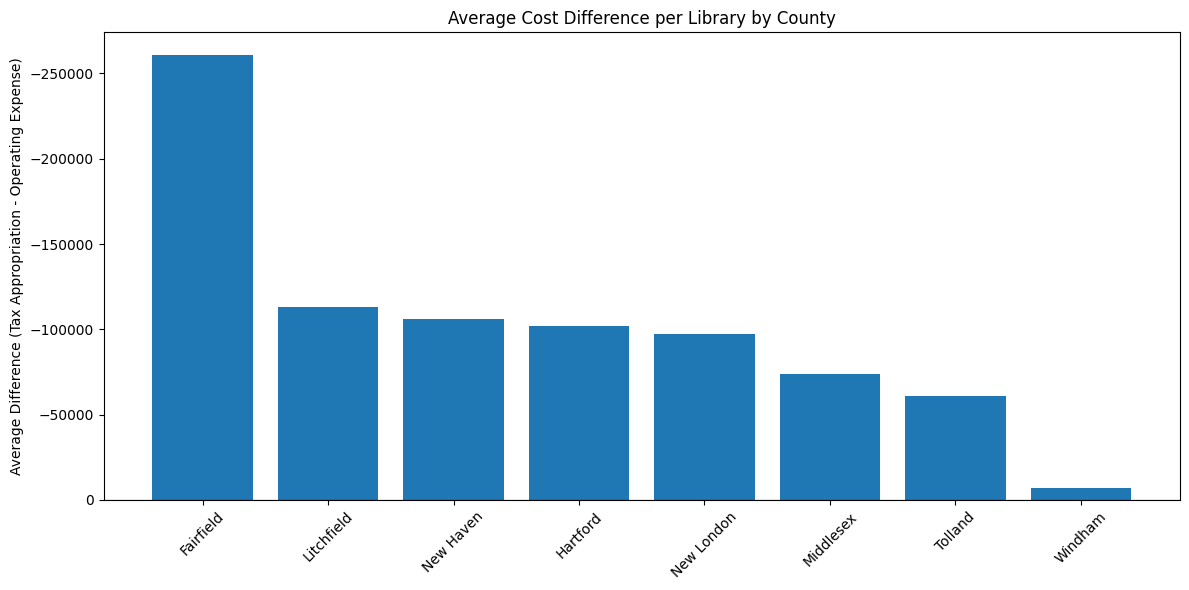

In [128]:
# Flip the vertical bar charts so that the zero axis starts from the bottom left
# This means keeping the vertical layout but ensuring the y-axis has zero at the bottom

# Chart 1: Average Difference
plt.figure(figsize=(12, 6))
plt.bar(sorted_df["County"], sorted_df["Average_Difference"])
plt.ylabel("Average Difference (Tax Appropriation - Operating Expense)")
plt.title("Average Cost Difference per Library by County")
plt.axhline(0, color='black', linewidth=0.8)
plt.xticks(rotation=45)
plt.gca().invert_yaxis()  # Flip y-axis to have negative at the bottom
plt.tight_layout()
plt.show()



In [120]:
# Recreate county_diff_sorted_flipped to ensure it's available
county_diff = df.groupby("County")[["Town Tax Appropriation for Library", "Operating Expenditures"]].mean()
county_diff["Difference"] = county_diff["Town Tax Appropriation for Library"] - county_diff["Operating Expenditures"]
county_diff_sorted_flipped = county_diff.sort_values("Difference", ascending=True)

# Prepare the DataFrame and round values to the nearest tenth
county_diff_display = county_diff_sorted_flipped.reset_index()
county_diff_display.columns = ["County", "Avg Tax Appropriation", "Avg Operating Expenditures", "Difference"]
county_diff_display_rounded = county_diff_display.copy()
county_diff_display_rounded[["Avg Tax Appropriation", "Avg Operating Expenditures", "Difference"]] = \
    county_diff_display_rounded[["Avg Tax Appropriation", "Avg Operating Expenditures", "Difference"]].round(1)

# Display the rounded DataFrame without using ace_tools
county_diff_display_rounded




,County,Avg Tax Appropriation,Avg Operating Expenditures,Difference
0,Fairfield,1975610.9,2233785.1,-258174.2
1,Litchfield,191470.5,303217.9,-111747.4
2,New Haven,919876.0,1025052.1,-105176.2
3,Hartford,1271257.7,1374600.5,-103342.8
4,New London,374198.5,472796.6,-98598.1
5,Middlesex,450740.8,524381.1,-73640.3
6,Tolland,309039.6,369432.3,-60392.7
7,Windham,141041.5,147523.2,-6481.7


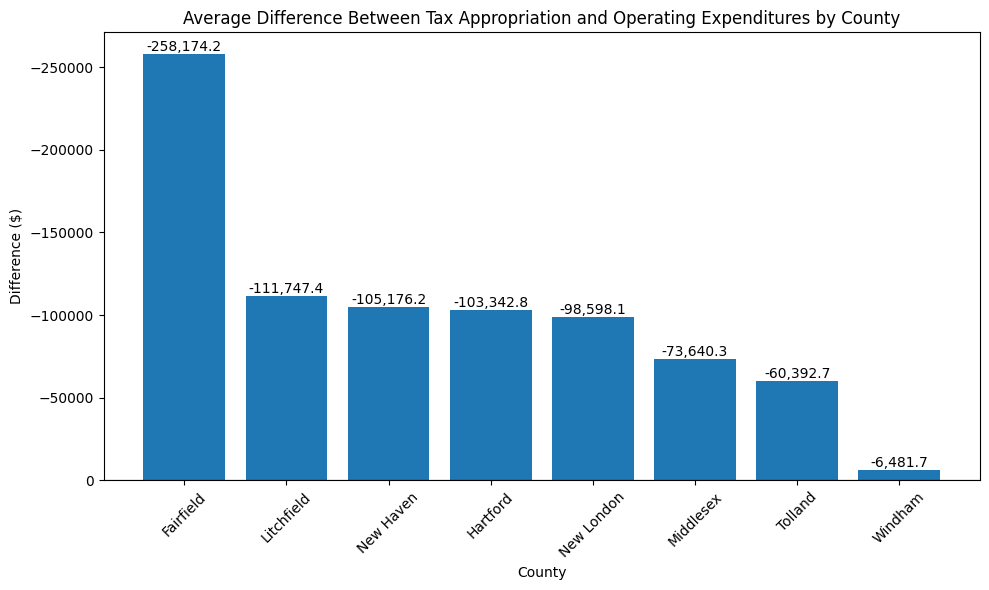

In [127]:
# Flip the chart 180 degrees by inverting the y-axis and reversing the order
plt.figure(figsize=(10, 6))
bars = plt.bar(county_diff_display_rounded["County"], county_diff_display_rounded["Difference"])

# Invert y-axis to flip chart vertically
plt.gca().invert_yaxis()

# Add labels to the bars, still oriented upright
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,.1f}', ha='center',
             va='top' if yval >= 0 else 'bottom')

plt.axhline(0, color='black', linewidth=0.8)
plt.title("Average Difference Between Tax Appropriation and Operating Expenditures by County")
plt.ylabel("Difference ($)")
plt.xlabel("County")
plt.xticks(rotation=45)

plt.tight_layout()

plt.show()


In [106]:
# Group data by county and aggregate tax, expenditures, and population
county_per_capita = (
    df
    .dropna(subset=["County", "Town Tax Appropriation for Library", "Operating Expenditures", "Population of Service Area"])
    .groupby("County")[["Town Tax Appropriation for Library", "Operating Expenditures", "Population of Service Area"]]
    .sum()
    .reset_index()
)

# Calculate total surplus/deficit
county_per_capita["Surplus/Deficit"] = (
    county_per_capita["Town Tax Appropriation for Library"] - county_per_capita["Operating Expenditures"]
)

# Calculate per capita
county_per_capita["Deficit Per Capita"] = (
    county_per_capita["Surplus/Deficit"] / county_per_capita["Population of Service Area"]
).round(2)

# Sort by deficit per capita
county_per_capita_sorted = county_per_capita.sort_values("Deficit Per Capita")

# Display
print(county_per_capita_sorted[["County", "Surplus/Deficit", "Population of Service Area", "Deficit Per Capita"]])


       County  Surplus/Deficit  Population of Service Area  Deficit Per Capita
2  Litchfield    -7.875377e+07                   5085669.0              -15.49
3   Middlesex    -3.202733e+07                   4500567.0               -7.12
0   Fairfield    -1.695310e+08                  25219794.0               -6.72
5  New London    -4.620124e+07                   8057393.0               -5.73
6     Tolland    -2.214818e+07                   4051321.0               -5.47
1    Hartford    -8.688016e+07                  24505598.0               -3.55
4   New Haven    -7.434144e+07                  23565112.0               -3.15
7     Windham    -2.511766e+06                   3233361.0               -0.78


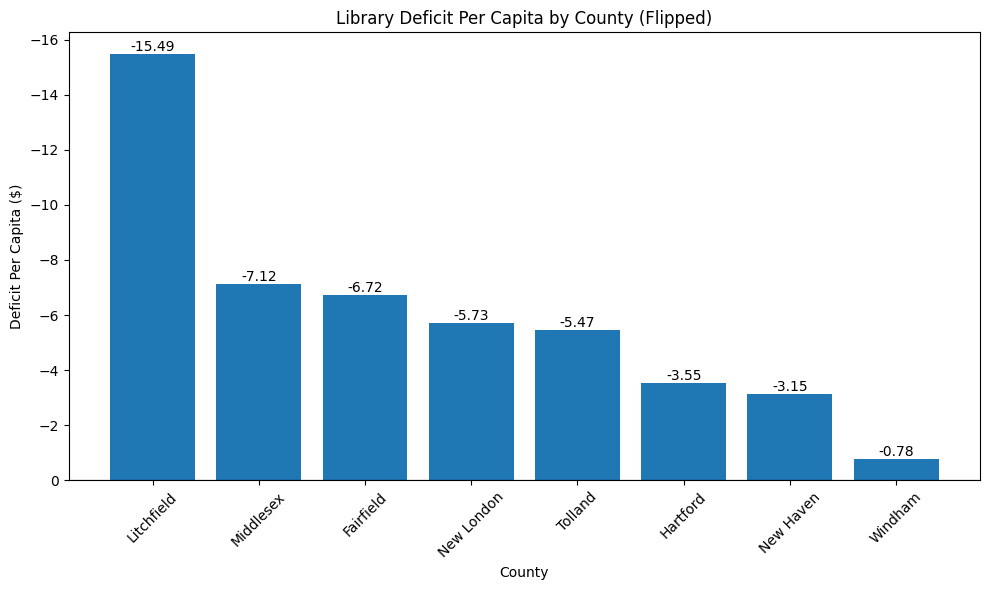

In [126]:
# Plot the Deficit Per Capita by County with a 180-degree flip
plt.figure(figsize=(10, 6))
bars = plt.bar(county_per_capita_sorted["County"], county_per_capita_sorted["Deficit Per Capita"])

# Invert y-axis to flip chart 180 degrees
plt.gca().invert_yaxis()

# Add labels to the bars, still upright
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='top' if yval >= 0 else 'bottom')

plt.axhline(0, color='black', linewidth=0.8)
plt.title("Library Deficit Per Capita by County (Flipped)")
plt.ylabel("Deficit Per Capita ($)")
plt.xlabel("County")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


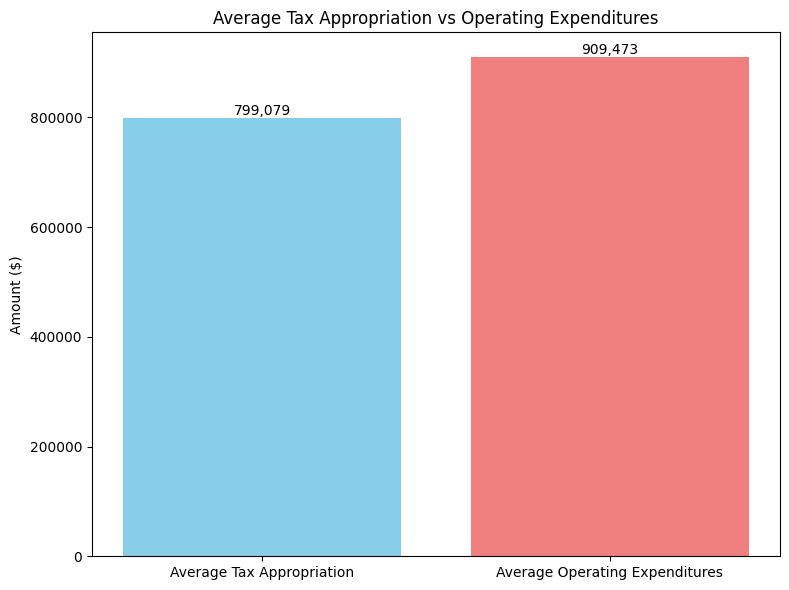

In [125]:
# Calculate average total tax appropriation and operating expenditures across all counties
avg_tax = df["Town Tax Appropriation for Library"].mean()
avg_expenditures = df["Operating Expenditures"].mean()

# Prepare data for plotting
categories = ["Average Tax Appropriation", "Average Operating Expenditures"]
values = [avg_tax, avg_expenditures]

# Plotting
plt.figure(figsize=(8, 6))
bars = plt.bar(categories, values, color=["skyblue", "lightcoral"])

# Add labels
for i, val in enumerate(values):
    plt.text(i, val, f'{val:,.0f}', ha='center', va='bottom')

plt.title("Average Tax Appropriation vs Operating Expenditures")
plt.ylabel("Amount ($)")
plt.tight_layout()

plt.show()


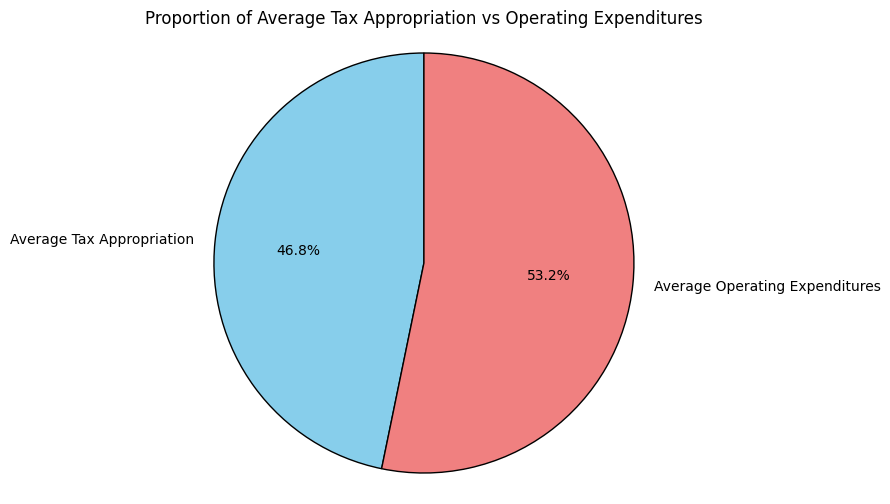

In [129]:
# Prepare data for pie chart
labels = ["Average Tax Appropriation", "Average Operating Expenditures"]
sizes = [avg_tax, avg_expenditures]
colors = ["skyblue", "lightcoral"]

# Plotting pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title("Proportion of Average Tax Appropriation vs Operating Expenditures")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


In [131]:
# Calculate the average tax appropriation and operating expenditures by county
county_avg = (
    df.dropna(subset=["County", "Town Tax Appropriation for Library", "Operating Expenditures"])
    .groupby("County")[["Town Tax Appropriation for Library", "Operating Expenditures"]]
    .mean()
    .reset_index()
)

# Rename columns for clarity
county_avg.columns = ["County", "Avg Tax Appropriation", "Avg Operating Expenditures"]

# Display the county-level averages
county_avg


,County,Avg Tax Appropriation,Avg Operating Expenditures
0,Fairfield,1.975611e+06,2.236671e+06
1,Hartford,1.272717e+06,1.374601e+06
2,Litchfield,1.913174e+05,3.041849e+05
3,Middlesex,4.507408e+05,5.243811e+05
4,New Haven,9.198760e+05,1.025737e+06
5,New London,3.754739e+05,4.727966e+05
6,Tolland,3.090396e+05,3.700539e+05
7,Windham,1.410415e+05,1.480033e+05


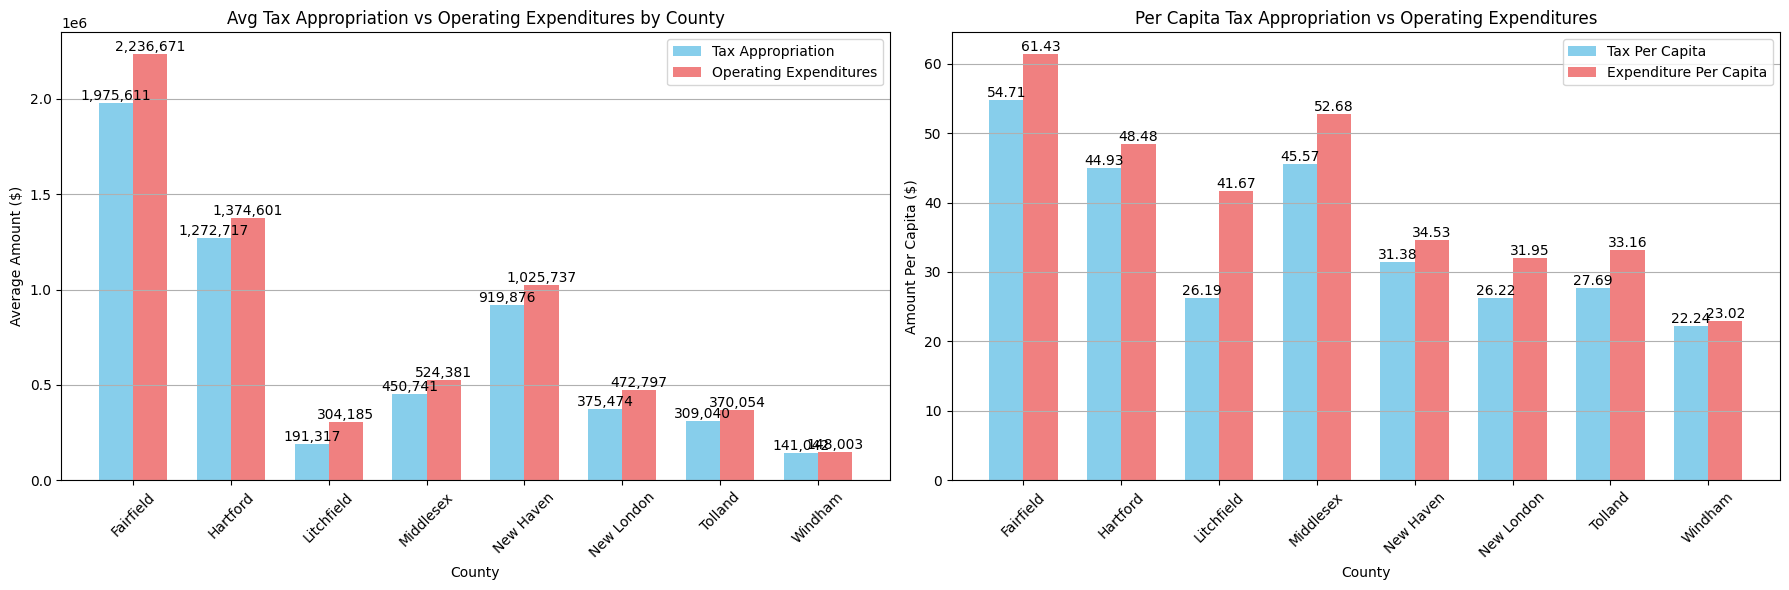

In [137]:
# Plot setup with labeled bars for both charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# --- Side-by-side bar chart for total averages ---
bar_width = 0.35
x = range(len(county_avg))

bars1 = ax1.bar(x, county_avg["Avg Tax Appropriation"], width=bar_width, label="Tax Appropriation", color="skyblue")
bars2 = ax1.bar([i + bar_width for i in x], county_avg["Avg Operating Expenditures"], width=bar_width, label="Operating Expenditures", color="lightcoral")

# Add labels to total average chart
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,.0f}', ha='center', va='bottom')
for bar in bars2:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,.0f}', ha='center', va='bottom')

ax1.set_xlabel("County")
ax1.set_ylabel("Average Amount ($)")
ax1.set_title("Avg Tax Appropriation vs Operating Expenditures by County")
ax1.set_xticks([i + bar_width / 2 for i in x])
ax1.set_xticklabels(county_avg["County"], rotation=45)
ax1.legend()
ax1.grid(True, axis='y')

# --- Bar chart for per capita values ---
x2 = range(len(county_per_capita))
bars3 = ax2.bar(x2, county_per_capita["Tax Per Capita"], width=bar_width, label="Tax Per Capita", color="skyblue")
bars4 = ax2.bar([i + bar_width for i in x2], county_per_capita["Expenditure Per Capita"], width=bar_width, label="Expenditure Per Capita", color="lightcoral")

# Add labels to per capita chart
for bar in bars3:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')
for bar in bars4:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')

ax2.set_xlabel("County")
ax2.set_ylabel("Amount Per Capita ($)")
ax2.set_title("Per Capita Tax Appropriation vs Operating Expenditures")
ax2.set_xticks([i + bar_width / 2 for i in x2])
ax2.set_xticklabels(county_per_capita["County"], rotation=45)
ax2.legend()
ax2.grid(True, axis='y')

plt.tight_layout()
plt.show()


In [143]:

# Recalculate % Difference to ensure the column exists
county_avg_table = county_avg.copy()
county_avg_table["Avg Tax Appropriation"] = county_avg_table["Avg Tax Appropriation"].round(0).astype(int)
county_avg_table["Avg Operating Expenditures"] = county_avg_table["Avg Operating Expenditures"].round(0).astype(int)
county_avg_table["% Difference"] = (
    (county_avg_table["Avg Tax Appropriation"] - county_avg_table["Avg Operating Expenditures"]) /
    county_avg_table["Avg Operating Expenditures"] * 100
).round(2)

# Display the cleaned and complete table
county_avg_table[["County", "Avg Tax Appropriation", "Avg Operating Expenditures", "% Difference"]]

# Sort the table by % Difference from highest to lowest
county_avg_table_sorted = county_avg_table.sort_values("% Difference", ascending=False).reset_index(drop=True)

# Display the sorted table
county_avg_table_sorted[["County", "Avg Tax Appropriation", "Avg Operating Expenditures", "% Difference"]]



,County,Avg Tax Appropriation,Avg Operating Expenditures,% Difference
0,Windham,141042,148003,-4.70
1,Hartford,1272717,1374601,-7.41
2,New Haven,919876,1025737,-10.32
3,Fairfield,1975611,2236671,-11.67
4,Middlesex,450741,524381,-14.04
5,Tolland,309040,370054,-16.49
6,New London,375474,472797,-20.58
7,Litchfield,191317,304185,-37.11


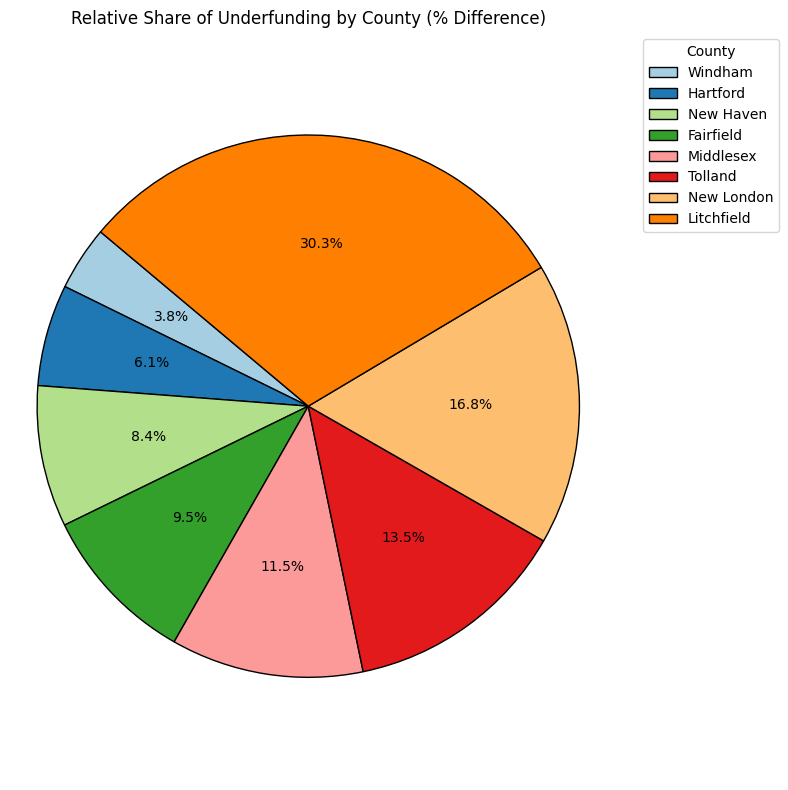

In [153]:
# Create pie chart with legend
plt.figure(figsize=(8, 8))
patches, texts, autotexts = plt.pie(
    sizes,
    labels=None,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'black'}
)

# Add legend
plt.legend(patches, labels, title="County", bbox_to_anchor=(1.05, 1), loc='upper left')

# Title and layout
plt.title("Relative Share of Underfunding by County (% Difference)")
plt.axis('equal')  # Keep it circular
plt.tight_layout()

plt.show()



In [154]:
# Aggregate total circulation and total reference questions over all records
total_circulation = df["Total Circulation"].sum()
total_reference = df["Reference Questions"].sum()

total_circulation, total_reference


(763072426.0, 94369321.0)

In [155]:
# Create a labeled dictionary to display total values with descriptions
library_usage_summary = {
    "Total Circulation (items loaned)": total_circulation,
    "Total Reference Questions (info/help requests)": total_reference
}

library_usage_summary


{'Total Circulation (items loaned)': 763072426.0,
 'Total Reference Questions (info/help requests)': 94369321.0}

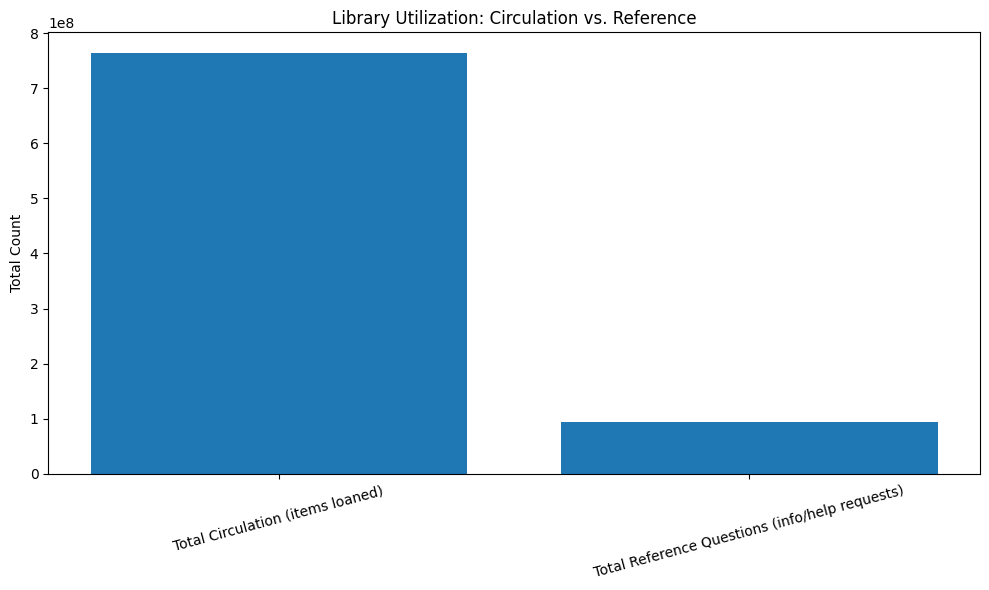

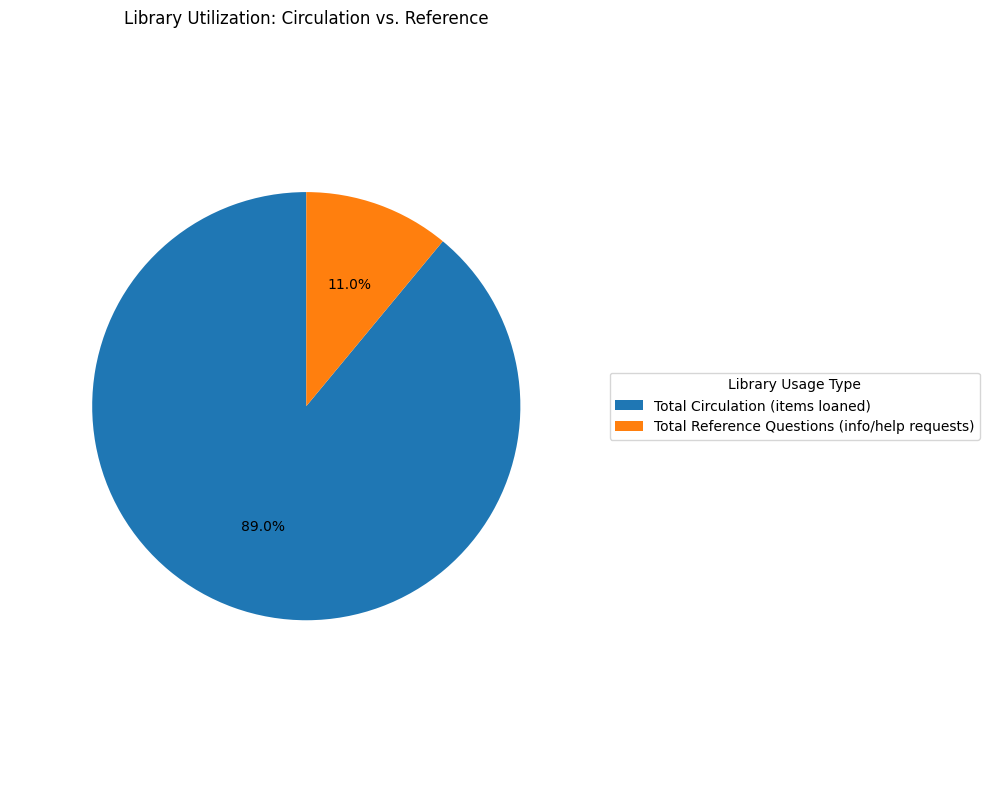

In [165]:
# Prepare data for visualization
labels = list(library_usage_summary.keys())
values = list(library_usage_summary.values())

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(labels, values)
plt.title("Library Utilization: Circulation vs. Reference")
plt.ylabel("Total Count")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# Create a pie chart with the legend positioned to the right of the pie
plt.figure(figsize=(10, 8))
patches, texts, autotexts = plt.pie(
    values,
    labels=None,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors
)

# Add legend to the right of the pie
plt.legend(patches, labels, loc="center left", bbox_to_anchor=(1, 0.5), title="Library Usage Type")
plt.title("Library Utilization: Circulation vs. Reference")
plt.axis('equal')
plt.tight_layout()
plt.show()




In [166]:
# Group data by 'Fiscal Year' and sum both circulation and reference questions
yearly_totals = df.groupby("Fiscal Year")[["Total Circulation", "Reference Questions"]].sum()

# Calculate average per year
average_circulation_per_year = yearly_totals["Total Circulation"].mean()
average_reference_per_year = yearly_totals["Reference Questions"].mean()

average_circulation_per_year, average_reference_per_year


(27252586.64285714, 3370332.8928571427)

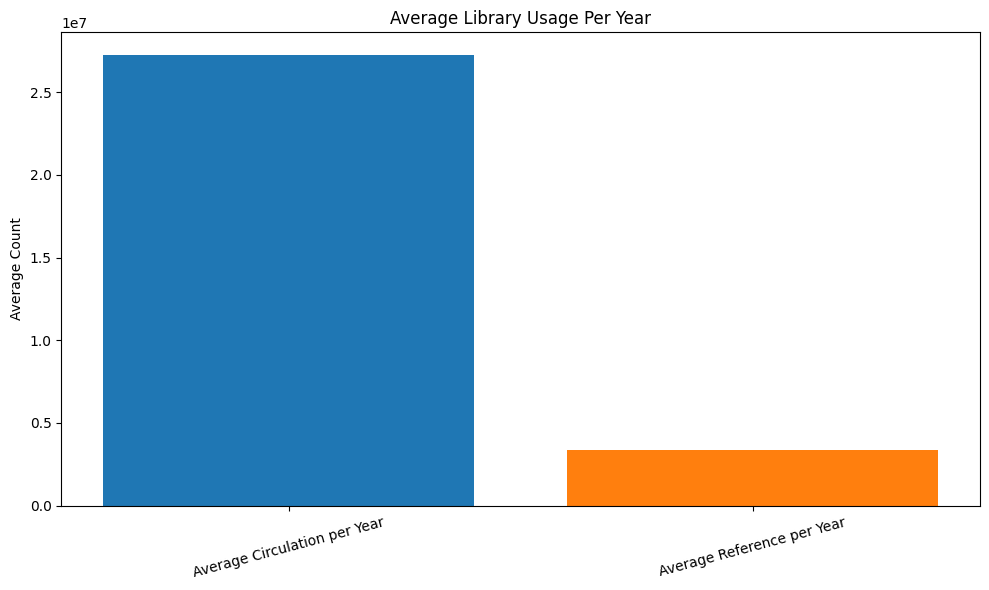

In [167]:
# Prepare data for average usage per year
average_labels = ['Average Circulation per Year', 'Average Reference per Year']
average_values = [average_circulation_per_year, average_reference_per_year]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(average_labels, average_values, color=['#1f77b4', '#ff7f0e'])  # Blue and orange
plt.title("Average Library Usage Per Year")
plt.ylabel("Average Count")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


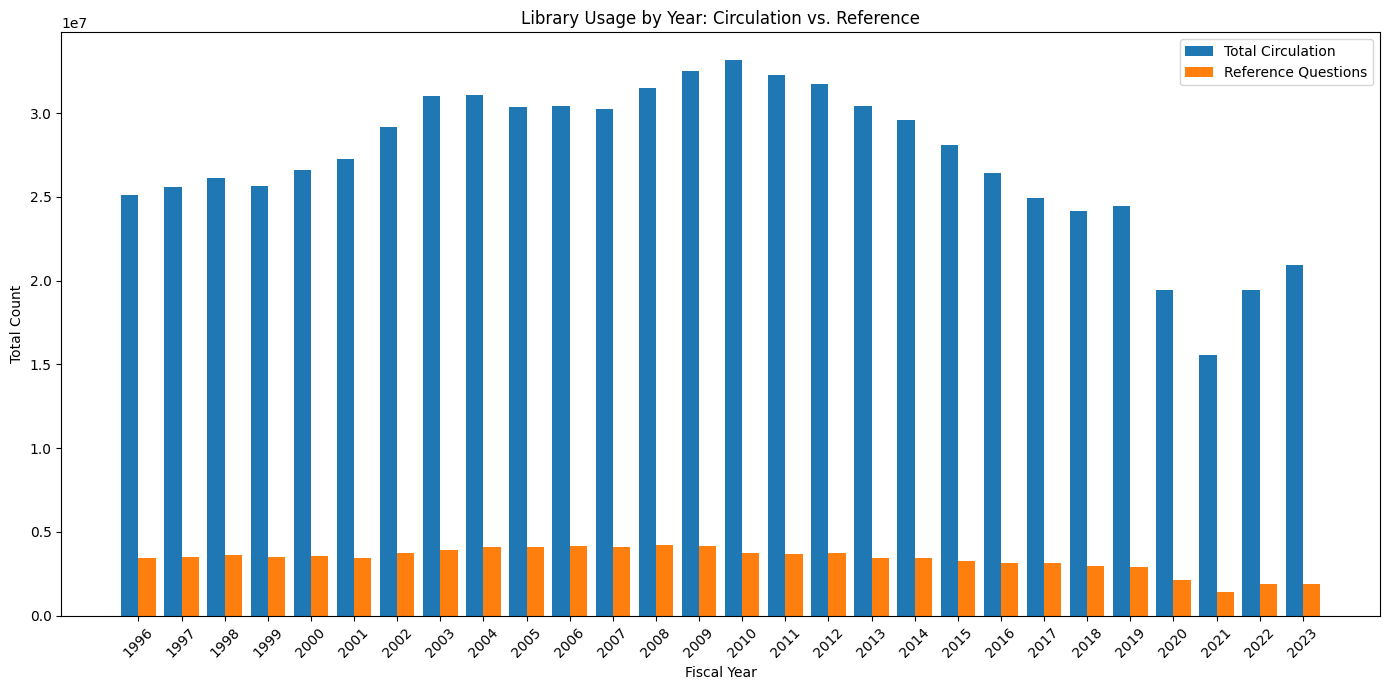

In [168]:
# Reset index to make 'Fiscal Year' a column for plotting
yearly_totals_reset = yearly_totals.reset_index()

# Create a grouped bar chart for circulation and reference per year
plt.figure(figsize=(14, 7))
plt.bar(yearly_totals_reset["Fiscal Year"] - 0.2, yearly_totals_reset["Total Circulation"], width=0.4, label="Total Circulation", color='#1f77b4')
plt.bar(yearly_totals_reset["Fiscal Year"] + 0.2, yearly_totals_reset["Reference Questions"], width=0.4, label="Reference Questions", color='#ff7f0e')

plt.title("Library Usage by Year: Circulation vs. Reference")
plt.xlabel("Fiscal Year")
plt.ylabel("Total Count")
plt.legend()
plt.xticks(yearly_totals_reset["Fiscal Year"], rotation=45)
plt.tight_layout()
plt.show()


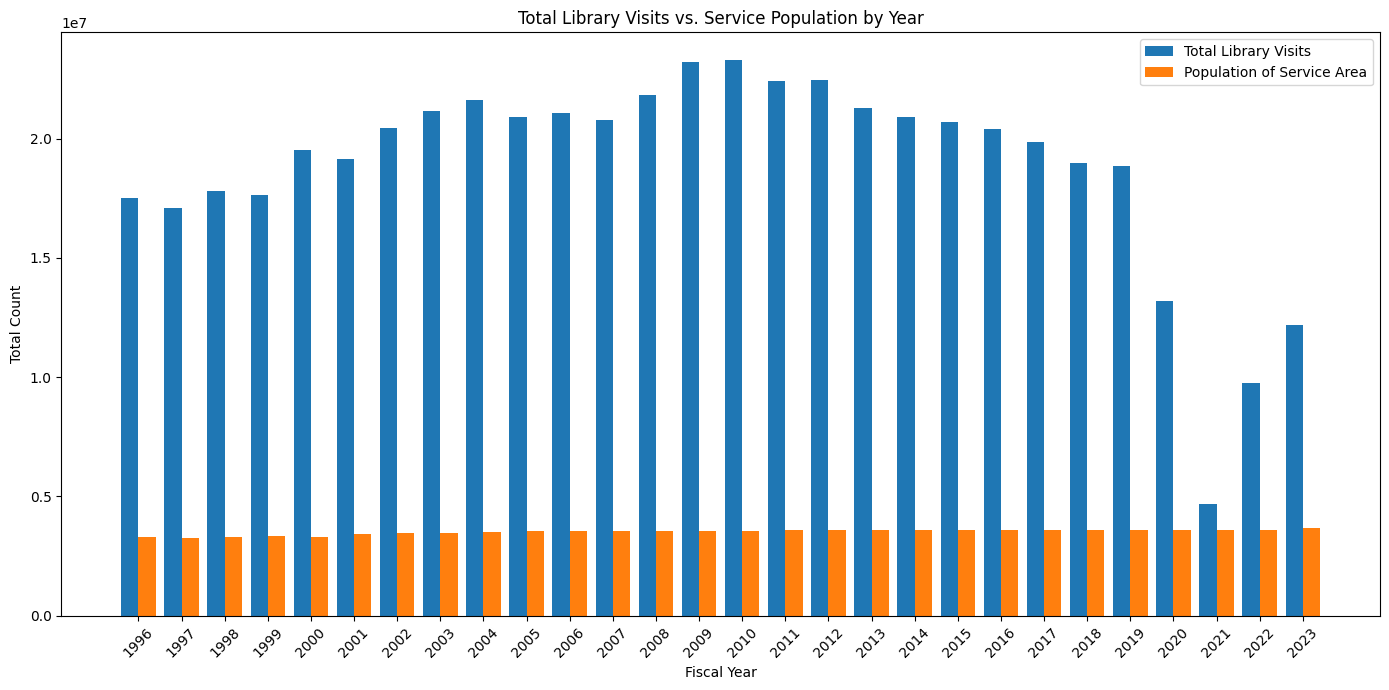

In [169]:
# Group data by fiscal year and sum 'Total Library Visits' and 'Population of Service Area'
visits_vs_population = df.groupby("Fiscal Year")[
    ["Total Library Visits", "Population of Service Area"]
].sum().reset_index()

# Create a grouped bar chart
plt.figure(figsize=(14, 7))
plt.bar(visits_vs_population["Fiscal Year"] - 0.2,
        visits_vs_population["Total Library Visits"],
        width=0.4, label="Total Library Visits", color='#1f77b4')
plt.bar(visits_vs_population["Fiscal Year"] + 0.2,
        visits_vs_population["Population of Service Area"],
        width=0.4, label="Population of Service Area", color='#ff7f0e')

plt.title("Total Library Visits vs. Service Population by Year")
plt.xlabel("Fiscal Year")
plt.ylabel("Total Count")
plt.legend()
plt.xticks(visits_vs_population["Fiscal Year"], rotation=45)
plt.tight_layout()
plt.show()


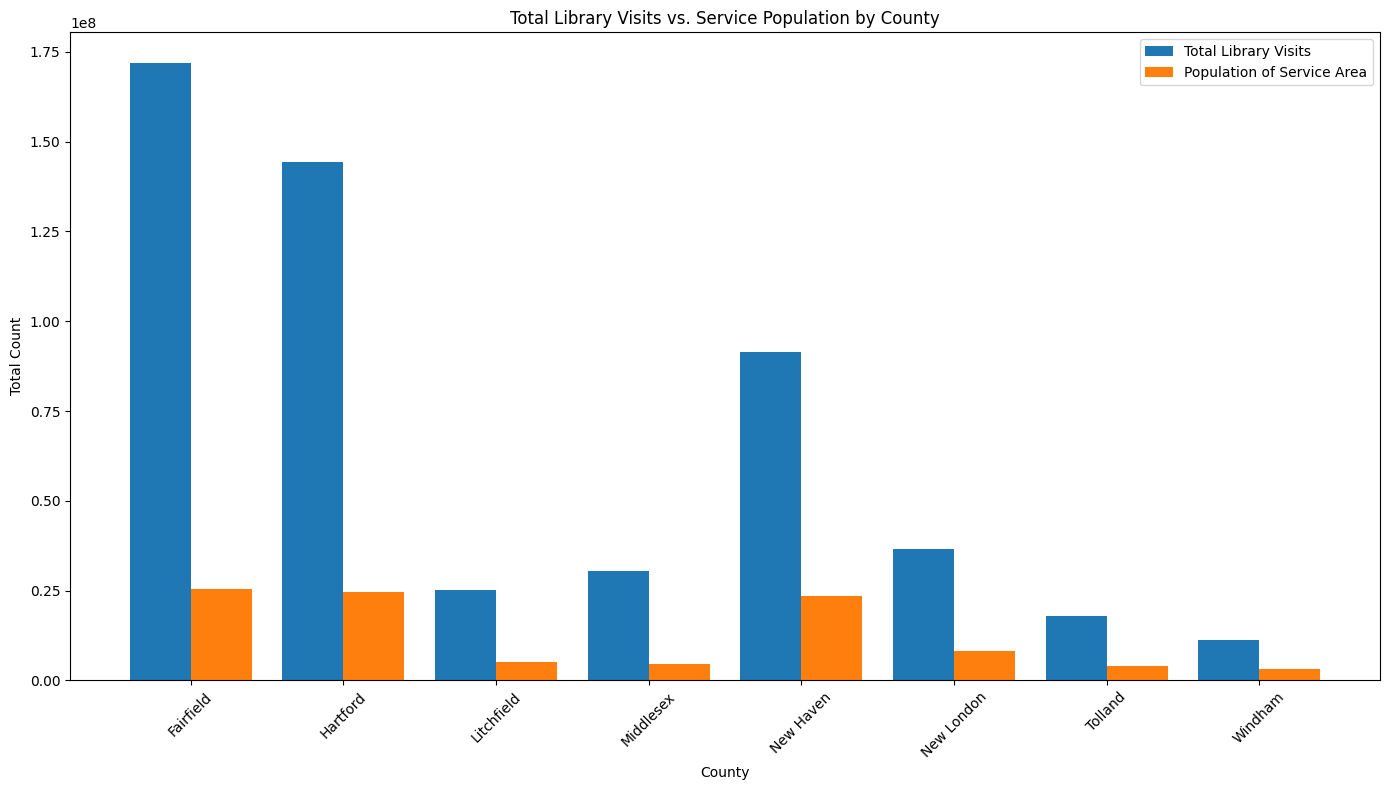

In [170]:
# Group data by County and sum 'Total Library Visits' and 'Population of Service Area'
county_totals = df.groupby("County")[["Total Library Visits", "Population of Service Area"]].sum().reset_index()

# Create grouped bar chart for counties
plt.figure(figsize=(14, 8))
x = range(len(county_totals))
bar_width = 0.4

plt.bar([i - bar_width/2 for i in x], county_totals["Total Library Visits"], 
        width=bar_width, label="Total Library Visits", color='#1f77b4')
plt.bar([i + bar_width/2 for i in x], county_totals["Population of Service Area"], 
        width=bar_width, label="Population of Service Area", color='#ff7f0e')

plt.title("Total Library Visits vs. Service Population by County")
plt.xlabel("County")
plt.ylabel("Total Count")
plt.xticks(x, county_totals["County"], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [174]:
# Calculate the percent difference: (visits - population) / population * 100
county_totals["Percent Difference (%)"] = (
    (county_totals["Total Library Visits"] - county_totals["Population of Service Area"]) /
    county_totals["Population of Service Area"]
) * 100
# Round the percent difference to the nearest 10th
county_totals["Percent Difference (%)"] = county_totals["Percent Difference (%)"].round(1)

# Display the rounded DataFrame without using ace_tools
county_totals[["County", "Total Library Visits", "Population of Service Area", "Percent Difference (%)"]]


,County,Total Library Visits,Population of Service Area,Percent Difference (%)
0,Fairfield,171869286.0,25324698.0,578.7
1,Hartford,144233731.0,24505598.0,488.6
2,Litchfield,25050944.0,5166287.0,384.9
3,Middlesex,30514515.0,4500567.0,578.0
4,New Haven,91464650.0,23565112.0,288.1
5,New London,36622462.0,8143300.0,349.7
6,Tolland,17927557.0,4077204.0,339.7
7,Windham,11196141.0,3233361.0,246.3


In [181]:
# Calculate cost per visit by county using total operating expenditures
county_cost_data = df.groupby("County")[["Total Library Visits", "Population of Service Area", "Operating Expenditures"]].sum().reset_index()

# Calculate cost per visit: total expenditures / total visits
county_cost_data["Cost Per Visit"] = county_cost_data["Operating Expenditures"] / county_cost_data["Total Library Visits"]

# Calculate percent difference (visits vs population)
county_cost_data["Percent Difference (%)"] = (
    (county_cost_data["Total Library Visits"] - county_cost_data["Population of Service Area"]) /
    county_cost_data["Population of Service Area"]
) * 100

# Round values for readability
county_cost_data["Cost Per Visit"] = county_cost_data["Cost Per Visit"].round(2)
county_cost_data["Percent Difference (%)"] = county_cost_data["Percent Difference (%)"].round(1)

county_cost_data[["County", "Total Library Visits", "Population of Service Area", "Percent Difference (%)", "Cost Per Visit"]]



,County,Total Library Visits,Population of Service Area,Percent Difference (%),Cost Per Visit
0,Fairfield,171869286.0,25324698.0,578.7,9.42
1,Hartford,144233731.0,24505598.0,488.6,8.25
2,Litchfield,25050944.0,5166287.0,384.9,8.55
3,Middlesex,30514515.0,4500567.0,578.0,7.94
4,New Haven,91464650.0,23565112.0,288.1,9.09
5,New London,36622462.0,8143300.0,349.7,7.42
6,Tolland,17927557.0,4077204.0,339.7,7.50
7,Windham,11196141.0,3233361.0,246.3,6.97


In [185]:
# Group by county and sum Total Visits, Population, and Registered Borrowers
visits_borrowers = df.groupby("County")[["Total Library Visits", "Population of Service Area", "Total Registered Borrowers"]].sum().reset_index()

# Calculate visits per person and visits per registered borrower
visits_borrowers["Visits Per Person"] = (visits_borrowers["Total Library Visits"] / visits_borrowers["Population of Service Area"]).round(2)
visits_borrowers["Visits Per Registered Borrower"] = (visits_borrowers["Total Library Visits"] / visits_borrowers["Total Registered Borrowers"]).round(2)

visits_borrowers[["County", "Visits Per Person", "Visits Per Registered Borrower"]]



,County,Visits Per Person,Visits Per Registered Borrower
0,Fairfield,6.79,12.67
1,Hartford,5.89,13.89
2,Litchfield,4.85,9.83
3,Middlesex,6.78,12.57
4,New Haven,3.88,8.60
5,New London,4.50,8.76
6,Tolland,4.40,9.94
7,Windham,3.46,7.81


In [187]:
# Add the "Visits Per Person" column back to the enhanced dataframe
enhanced_county_data["Visits Per Person"] = (
    enhanced_county_data["Total Library Visits"] / enhanced_county_data["Population of Service Area"]
).round(2)

# Display the corrected and complete table
enhanced_county_data_display = enhanced_county_data[[
    "County",
    "Total Library Visits",
    "Population of Service Area",
    "Percent Difference (%)",
    "Visits Per Person",
    "Visits Per Registered Borrower",
    "Cost Per Visit"
]]

enhanced_county_data_display



,County,Total Library Visits,Population of Service Area,Percent Difference (%),Visits Per Person,Visits Per Registered Borrower,Cost Per Visit
0,Fairfield,171869286.0,25324698.0,578.7,6.79,12.67,9.42
1,Hartford,144233731.0,24505598.0,488.6,5.89,13.89,8.25
2,Litchfield,25050944.0,5166287.0,384.9,4.85,9.83,8.55
3,Middlesex,30514515.0,4500567.0,578.0,6.78,12.57,7.94
4,New Haven,91464650.0,23565112.0,288.1,3.88,8.60,9.09
5,New London,36622462.0,8143300.0,349.7,4.50,8.76,7.42
6,Tolland,17927557.0,4077204.0,339.7,4.40,9.94,7.50
7,Windham,11196141.0,3233361.0,246.3,3.46,7.81,6.97


In [188]:
# Calculate cost per registered borrower
enhanced_county_data["Cost Per Registered Borrower"] = (
    enhanced_county_data["Operating Expenditures"] / 
    (enhanced_county_data["Total Library Visits"] / enhanced_county_data["Visits Per Registered Borrower"])
).round(2)

# Display updated table
enhanced_county_data_display_updated = enhanced_county_data[[
    "County",
    "Total Library Visits",
    "Population of Service Area",
    "Percent Difference (%)",
    "Visits Per Person",
    "Visits Per Registered Borrower",
    "Cost Per Registered Borrower"
]]

enhanced_county_data_display_updated



,County,Total Library Visits,Population of Service Area,Percent Difference (%),Visits Per Person,Visits Per Registered Borrower,Cost Per Registered Borrower
0,Fairfield,171869286.0,25324698.0,578.7,6.79,12.67,119.39
1,Hartford,144233731.0,24505598.0,488.6,5.89,13.89,114.64
2,Litchfield,25050944.0,5166287.0,384.9,4.85,9.83,84.00
3,Middlesex,30514515.0,4500567.0,578.0,6.78,12.57,99.80
4,New Haven,91464650.0,23565112.0,288.1,3.88,8.60,78.16
5,New London,36622462.0,8143300.0,349.7,4.50,8.76,65.03
6,Tolland,17927557.0,4077204.0,339.7,4.40,9.94,74.56
7,Windham,11196141.0,3233361.0,246.3,3.46,7.81,54.44


In [190]:
# Calculate cost per capita: Operating Expenditures / Population of Service Area
enhanced_county_data["Cost Per Capita"] = (
    enhanced_county_data["Operating Expenditures"] / enhanced_county_data["Population of Service Area"]
).round(2)

# Display updated table with cost per capita included
enhanced_county_data[[
    "County",
    "Total Library Visits",
    "Population of Service Area",
    "Percent Difference (%)",
    "Visits Per Person",
    "Visits Per Registered Borrower",
    "Cost Per Capita"
]]


,County,Total Library Visits,Population of Service Area,Percent Difference (%),Visits Per Person,Visits Per Registered Borrower,Cost Per Capita
0,Fairfield,171869286.0,25324698.0,578.7,6.79,12.67,63.95
1,Hartford,144233731.0,24505598.0,488.6,5.89,13.89,48.58
2,Litchfield,25050944.0,5166287.0,384.9,4.85,9.83,41.44
3,Middlesex,30514515.0,4500567.0,578.0,6.78,12.57,53.83
4,New Haven,91464650.0,23565112.0,288.1,3.88,8.60,35.28
5,New London,36622462.0,8143300.0,349.7,4.50,8.76,33.38
6,Tolland,17927557.0,4077204.0,339.7,4.40,9.94,32.98
7,Windham,11196141.0,3233361.0,246.3,3.46,7.81,24.14


In [191]:
# Recalculate cost per registered borrower
cost_per_registered_borrower = (
    enhanced_county_data["Operating Expenditures"] /
    (enhanced_county_data["Total Library Visits"] / enhanced_county_data["Visits Per Registered Borrower"])
).round(2)

# Calculate difference between cost per registered borrower and cost per capita
cost_difference = (cost_per_registered_borrower - enhanced_county_data["Cost Per Capita"]).round(2)

# Create summary table
cost_diff_table = pd.DataFrame({
    "County": enhanced_county_data["County"],
    "Cost Per Capita": enhanced_county_data["Cost Per Capita"],
    "Cost Per Registered Borrower": cost_per_registered_borrower,
    "Difference ($)": cost_difference
})

cost_diff_table


,County,Cost Per Capita,Cost Per Registered Borrower,Difference ($)
0,Fairfield,63.95,119.39,55.44
1,Hartford,48.58,114.64,66.06
2,Litchfield,41.44,84.00,42.56
3,Middlesex,53.83,99.80,45.97
4,New Haven,35.28,78.16,42.88
5,New London,33.38,65.03,31.65
6,Tolland,32.98,74.56,41.58
7,Windham,24.14,54.44,30.30


In [192]:
# Sum total population and total registered borrowers across all counties
total_population = df["Population of Service Area"].sum()
total_registered_borrowers = df["Total Registered Borrowers"].sum()

total_population, total_registered_borrowers


(98516127.0, 46972102.0)

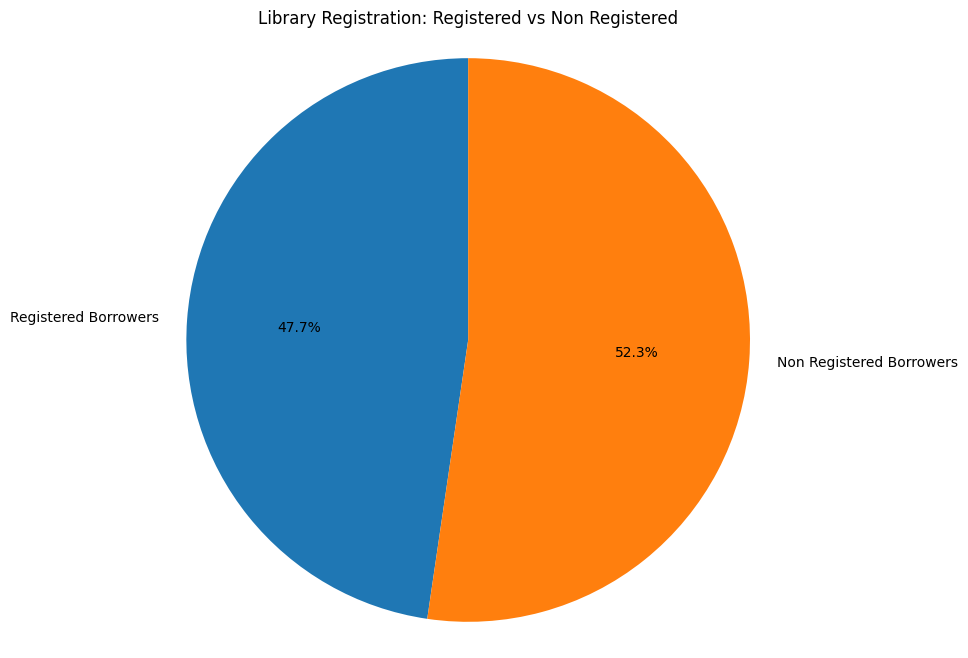

In [195]:
# Prepare data for pie chart
values = [total_registered_borrowers, total_population - total_registered_borrowers]
labels = ["Registered Borrowers", "Non Registered Borrowers"]
colors = ['#1f77b4', '#ff7f0e']

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Library Registration: Registered vs Non Registered")
plt.axis('equal')  # Ensures the pie chart is a circle
plt.show()


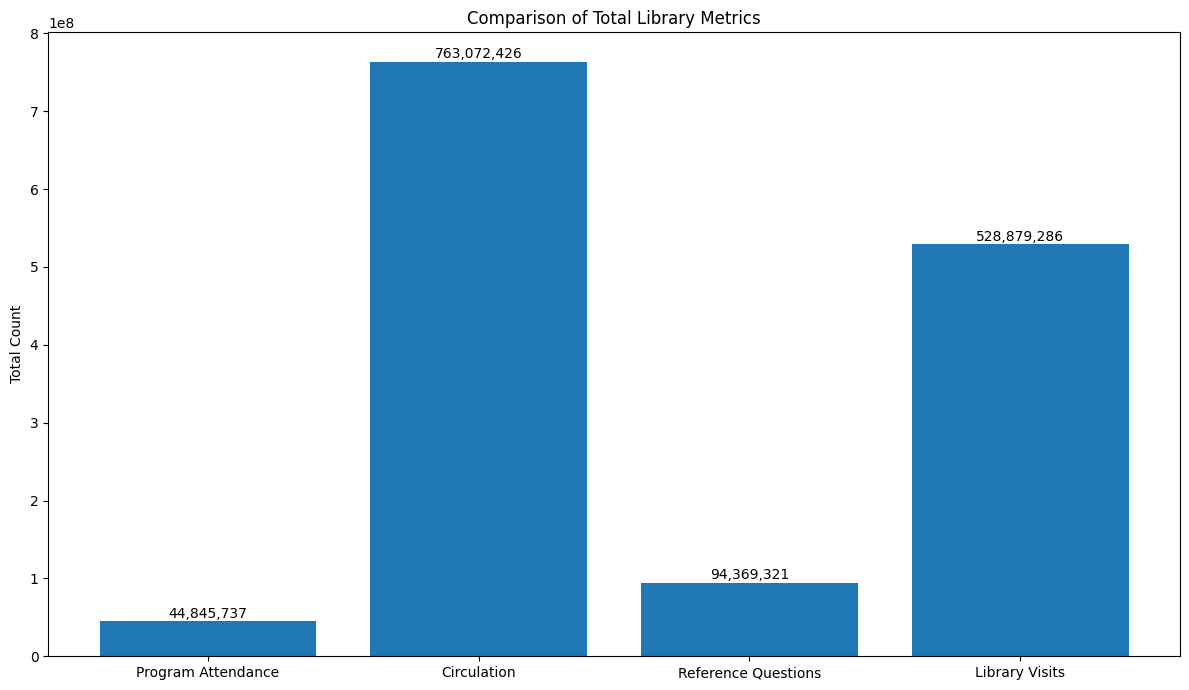

In [200]:
# Sum the required fields
total_attendance = df["Total Program Attendance & Views"].sum()
total_circulation = df["Total Circulation"].sum()
total_reference = df["Reference Questions"].sum()
total_visits = df["Total Library Visits"].sum()

# Prepare data for visualization
categories = ["Program Attendance", "Circulation", "Reference Questions", "Library Visits"]
totals = [total_attendance, total_circulation, total_reference, total_visits]

# Create bar chart with labels
plt.figure(figsize=(12, 7))
bars = plt.bar(categories, totals, color='#1f77b4')

# Add value labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1e6, f'{int(yval):,}', ha='center', va='bottom', fontsize=10)

# Formatting
plt.ylabel("Total Count")
plt.title("Comparison of Total Library Metrics")
plt.tight_layout()
plt.show()



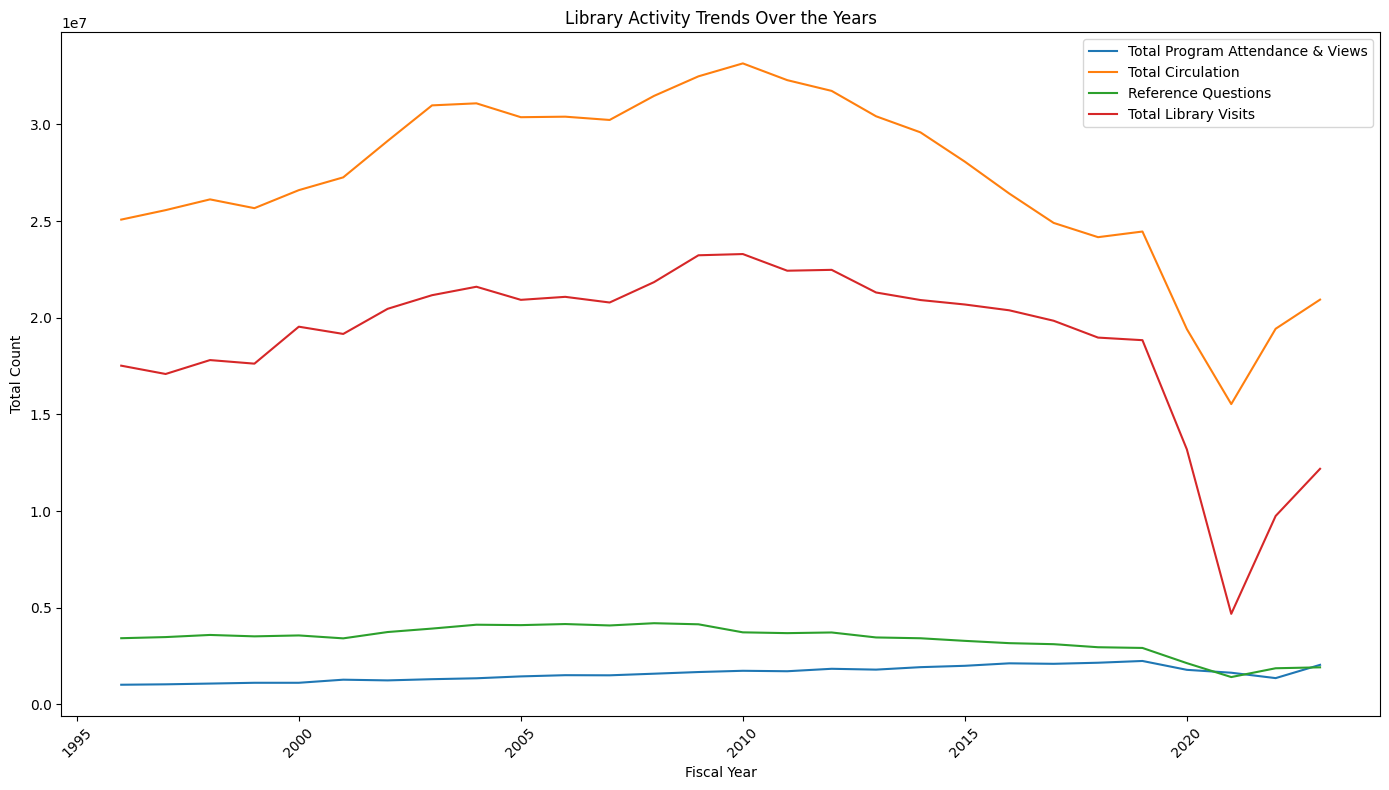

In [199]:
# Group by Fiscal Year and sum key activity metrics
yearly_comparison = df.groupby("Fiscal Year")[[
    "Total Program Attendance & Views",
    "Total Circulation",
    "Reference Questions",
    "Total Library Visits"
]].sum().reset_index()

# Plot line chart for each metric over the years
plt.figure(figsize=(14, 8))
for column in yearly_comparison.columns[1:]:
    plt.plot(yearly_comparison["Fiscal Year"], yearly_comparison[column], label=column)

# Formatting
plt.title("Library Activity Trends Over the Years")
plt.xlabel("Fiscal Year")
plt.ylabel("Total Count")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [202]:
import os
notebook_path = os.path.abspath("Library Data Analysis.ipynb")
print(notebook_path)


C:\Users\Data\Desktop\Anna Christensen - files\colab files\Library Data Analysis.ipynb


In [206]:
cd "C:\Users\Data\Desktop\Anna Christensen - files\colab files"


C:\Users\Data\Desktop\Anna Christensen - files\colab files


In [207]:
git init


SyntaxError: invalid syntax (3277417328.py, line 1)